### Analytics Vidya HR Analytics.

link : https://datahack.analyticsvidhya.com/contest/wns-analytics-hackathon-2018-1/#About

#### Importing Necessary Libraries

In [341]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from plotly.offline import download_plotlyjs, iplot, plot, init_notebook_mode
import cufflinks as cf
import plotly.express as px
from sklearn.model_selection import train_test_split, StratifiedKFold, RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier, BaggingClassifier, VotingClassifier, ExtraTreesClassifier#Ensemble models
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.naive_bayes import GaussianNB
from lightgbm import LGBMClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score #Metrics
from category_encoders import LeaveOneOutEncoder #Encoding
from mlxtend.classifier import StackingCVClassifier
from sklearn.svm import SVC
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import KBinsDiscretizer

In [4]:
init_notebook_mode(connected=True)

In [5]:
cf.go_offline()

#### Import Data

In [6]:
train_df = pd.read_csv('train_LZdllcl.csv')

test_df = pd.read_csv('test_2umaH9m.csv')

sample_df = pd.read_csv('sample_submission_M0L0uXE.csv')

In [7]:
train_df.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


In [8]:
test_df.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
0,8724,Technology,region_26,Bachelor's,m,sourcing,1,24,NaN,1,1,0,77
1,74430,HR,region_4,Bachelor's,f,other,1,31,3.0,5,0,0,51
2,72255,Sales & Marketing,region_13,Bachelor's,m,other,1,31,1.0,4,0,0,47
3,38562,Procurement,region_2,Bachelor's,f,other,3,31,2.0,9,0,0,65
4,64486,Finance,region_29,Bachelor's,m,sourcing,1,30,4.0,7,0,0,61


In [9]:
sample_df.head()

,employee_id,is_promoted
0,8724,0
1,74430,0
2,72255,0
3,38562,0
4,64486,0


In [10]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           54808 non-null  int64  
 1   department            54808 non-null  object 
 2   region                54808 non-null  object 
 3   education             52399 non-null  object 
 4   gender                54808 non-null  object 
 5   recruitment_channel   54808 non-null  object 
 6   no_of_trainings       54808 non-null  int64  
 7   age                   54808 non-null  int64  
 8   previous_year_rating  50684 non-null  float64
 9   length_of_service     54808 non-null  int64  
 10  KPIs_met >80%         54808 non-null  int64  
 11  awards_won?           54808 non-null  int64  
 12  avg_training_score    54808 non-null  int64  
 13  is_promoted           54808 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.9+ MB


In [11]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23490 entries, 0 to 23489
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           23490 non-null  int64  
 1   department            23490 non-null  object 
 2   region                23490 non-null  object 
 3   education             22456 non-null  object 
 4   gender                23490 non-null  object 
 5   recruitment_channel   23490 non-null  object 
 6   no_of_trainings       23490 non-null  int64  
 7   age                   23490 non-null  int64  
 8   previous_year_rating  21678 non-null  float64
 9   length_of_service     23490 non-null  int64  
 10  KPIs_met >80%         23490 non-null  int64  
 11  awards_won?           23490 non-null  int64  
 12  avg_training_score    23490 non-null  int64  
dtypes: float64(1), int64(7), object(5)
memory usage: 2.3+ MB


In [12]:
train_df.isna().sum()

employee_id                0
department                 0
region                     0
education               2409
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    4124
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
is_promoted                0
dtype: int64

In [13]:
test_df.isna().sum()

employee_id                0
department                 0
region                     0
education               1034
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    1812
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
dtype: int64

In [14]:
train_df.describe()

,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
count,54808.000000,54808.000000,54808.000000,50684.000000,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000
mean,39195.830627,1.253011,34.803915,3.329256,5.865512,0.351974,0.023172,63.386750,0.085170
std,22586.581449,0.609264,7.660169,1.259993,4.265094,0.477590,0.150450,13.371559,0.279137
min,1.000000,1.000000,20.000000,1.000000,1.000000,0.000000,0.000000,39.000000,0.000000
25%,19669.750000,1.000000,29.000000,3.000000,3.000000,0.000000,0.000000,51.000000,0.000000
50%,39225.500000,1.000000,33.000000,3.000000,5.000000,0.000000,0.000000,60.000000,0.000000
75%,58730.500000,1.000000,39.000000,4.000000,7.000000,1.000000,0.000000,76.000000,0.000000
max,78298.000000,10.000000,60.000000,5.000000,37.000000,1.000000,1.000000,99.000000,1.000000


In [15]:
test_df.describe()

,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
count,23490.000000,23490.000000,23490.000000,21678.000000,23490.000000,23490.000000,23490.000000,23490.000000
mean,39041.399149,1.254236,34.782929,3.339146,5.810387,0.358834,0.022776,63.263133
std,22640.809201,0.600910,7.679492,1.263294,4.207917,0.479668,0.149191,13.411750
min,3.000000,1.000000,20.000000,1.000000,1.000000,0.000000,0.000000,39.000000
25%,19370.250000,1.000000,29.000000,3.000000,3.000000,0.000000,0.000000,51.000000
50%,38963.500000,1.000000,33.000000,3.000000,5.000000,0.000000,0.000000,60.000000
75%,58690.000000,1.000000,39.000000,4.000000,7.000000,1.000000,0.000000,76.000000
max,78295.000000,9.000000,60.000000,5.000000,34.000000,1.000000,1.000000,99.000000


#### EDA

In [17]:
#To get unique values and its respective value counts.
def normal(col):
    print('No of unique values:\t', train_df[col].nunique()) #No of unique values.
    print('Values Count:\n', train_df[col].value_counts()) # Count of unique values.
    

In [134]:
def pie_chart(col, title):
    groupped = train_df.groupby([col,'is_promoted']).size().reset_index(name='Count')
    for i in groupped[col].unique():
        data = groupped[groupped[col] == i]
        fig = px.pie(data, values = 'Count', names = 'is_promoted', title = title+str(i)+':'+str((data['Count'].sum())))
        fig.show()
    

In [45]:
def percent_cat(col):
    groupped = train_df.groupby([col])['is_promoted'].value_counts()
    y=0
    for i in groupped.index:
        total_val = np.sum(train_df[col] == i[0])
        print(f'Percent of {i[1]} Promotion of {i[0]}  in column {col} is {round((groupped[i]/total_val)*100,2)}%')
        try:
            if groupped.index[y][0] != groupped.index[y+1][0]:
                print('\n')
        except IndexError:
            pass
        y+=1
    
#This user defined function is to get groupped df based on one column to find its respective stay.

In [19]:
def insight(col):
    plt.figure(figsize = (16,8))
    ax = sns.countplot(x = train_df[col], hue = train_df['Stay'])

    for p in ax.patches:
        ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.15, p.get_height()+13))

In [20]:
train_df['employee_id'].nunique()

54808

In [21]:
normal('no_of_trainings')

No of unique values:	 10
Values Count:
 1     44378
2      7987
3      1776
4       468
5       128
6        44
7        12
8         5
9         5
10        5
Name: no_of_trainings, dtype: int64


In [38]:
fig = px.histogram(data_frame = train_df.groupby(['no_of_trainings', 'is_promoted']).size().reset_index(name = 'Count'),
                  x = 'no_of_trainings', y = 'Count', color = 'is_promoted', marginal = 'rug', color_discrete_map={1:"#E45756", 0:'#1CBE4F'},
                  title = 'Employee with No of trainings is promoted')
fig.show()

In [42]:
px.pie(train_df.groupby(['no_of_trainings', 'is_promoted']).size().reset_index(name = 'Count'),
       values = 'Count', names = 'no_of_trainings')

In [46]:
percent_cat('no_of_trainings')

Percent of 0 Promotion of 1  in column no_of_trainings is 91.19%
Percent of 1 Promotion of 1  in column no_of_trainings is 8.81%


Percent of 0 Promotion of 2  in column no_of_trainings is 92.43%
Percent of 1 Promotion of 2  in column no_of_trainings is 7.57%


Percent of 0 Promotion of 3  in column no_of_trainings is 93.13%
Percent of 1 Promotion of 3  in column no_of_trainings is 6.87%


Percent of 0 Promotion of 4  in column no_of_trainings is 94.44%
Percent of 1 Promotion of 4  in column no_of_trainings is 5.56%


Percent of 0 Promotion of 5  in column no_of_trainings is 97.66%
Percent of 1 Promotion of 5  in column no_of_trainings is 2.34%


Percent of 0 Promotion of 6  in column no_of_trainings is 95.45%
Percent of 1 Promotion of 6  in column no_of_trainings is 4.55%


Percent of 0 Promotion of 7  in column no_of_trainings is 100.0%


Percent of 0 Promotion of 8  in column no_of_trainings is 100.0%


Percent of 0 Promotion of 9  in column no_of_trainings is 100.0%


Percent of 0 

In [109]:
pie_chart('no_of_trainings', 'No of trainings ')

In [54]:
fig = px.bar(x = train_df['no_of_trainings'].value_counts().index, y = train_df['no_of_trainings'].value_counts().values,
    )
fig.show()

In [55]:
normal('department')

No of unique values:	 9
Values Count:
 Sales & Marketing    16840
Operations           11348
Procurement           7138
Technology            7138
Analytics             5352
Finance               2536
HR                    2418
Legal                 1039
R&D                    999
Name: department, dtype: int64


In [110]:
pie_chart('department', 'Department ')

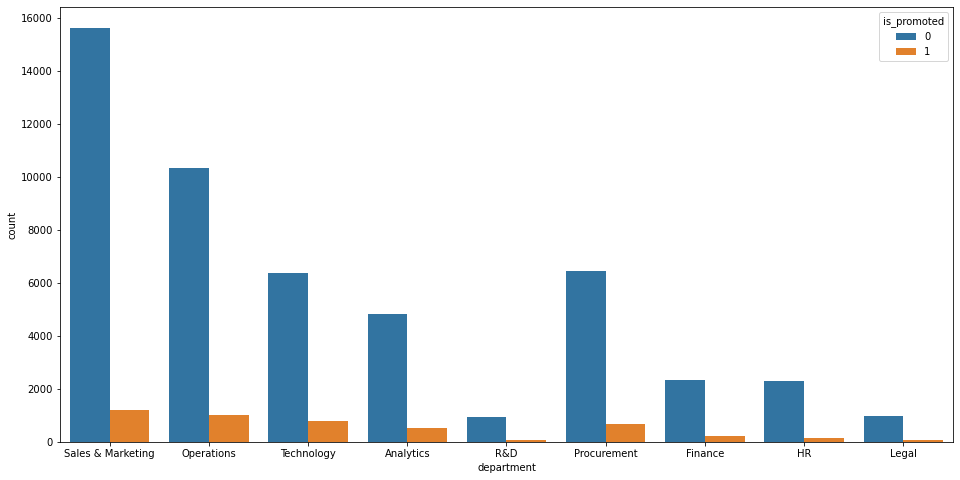

In [58]:
plt.figure(figsize = (16,8))
ax = sns.countplot(x = train_df['department'], hue = train_df['is_promoted'])

In [59]:
normal('region')

No of unique values:	 34
Values Count:
 region_2     12343
region_22     6428
region_7      4843
region_15     2808
region_13     2648
region_26     2260
region_31     1935
region_4      1703
region_27     1659
region_16     1465
region_28     1318
region_11     1315
region_23     1175
region_29      994
region_32      945
region_19      874
region_20      850
region_14      827
region_25      819
region_17      796
region_5       766
region_6       690
region_30      657
region_8       655
region_10      648
region_1       610
region_24      508
region_12      500
region_9       420
region_21      411
region_3       346
region_34      292
region_33      269
region_18       31
Name: region, dtype: int64


In [60]:
percent_cat('region')

Percent of 0 Promotion of region_1  in column region is 90.49%
Percent of 1 Promotion of region_1  in column region is 9.51%


Percent of 0 Promotion of region_10  in column region is 92.13%
Percent of 1 Promotion of region_10  in column region is 7.87%


Percent of 0 Promotion of region_11  in column region is 94.37%
Percent of 1 Promotion of region_11  in column region is 5.63%


Percent of 0 Promotion of region_12  in column region is 93.4%
Percent of 1 Promotion of region_12  in column region is 6.6%


Percent of 0 Promotion of region_13  in column region is 91.31%
Percent of 1 Promotion of region_13  in column region is 8.69%


Percent of 0 Promotion of region_14  in column region is 92.5%
Percent of 1 Promotion of region_14  in column region is 7.5%


Percent of 0 Promotion of region_15  in column region is 92.09%
Percent of 1 Promotion of region_15  in column region is 7.91%


Percent of 0 Promotion of region_16  in column region is 93.04%
Percent of 1 Promotion of region_16  in

In [62]:
normal('education')

No of unique values:	 3
Values Count:
 Bachelor's          36669
Master's & above    14925
Below Secondary       805
Name: education, dtype: int64


In [112]:
pie_chart('education', 'Education ')

In [64]:
normal('gender')

No of unique values:	 2
Values Count:
 m    38496
f    16312
Name: gender, dtype: int64


In [65]:
percent_cat('gender')

Percent of 0 Promotion of f  in column gender is 91.01%
Percent of 1 Promotion of f  in column gender is 8.99%


Percent of 0 Promotion of m  in column gender is 91.68%
Percent of 1 Promotion of m  in column gender is 8.32%


In [66]:
normal('recruitment_channel')

No of unique values:	 3
Values Count:
 other       30446
sourcing    23220
referred     1142
Name: recruitment_channel, dtype: int64


In [114]:
pie_chart('recruitment_channel', 'Recruitment Channel ')

<AxesSubplot:xlabel='age', ylabel='Density'>

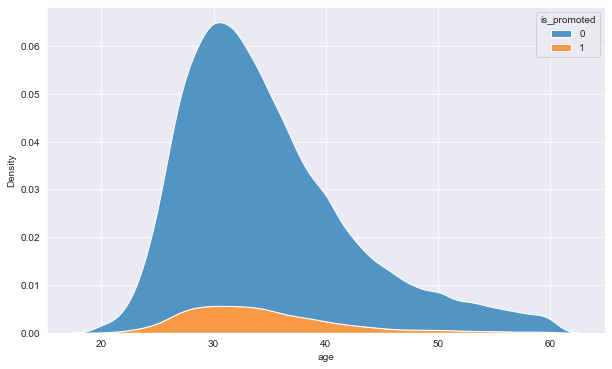

In [74]:
sns.set_style('darkgrid')
plt.figure(figsize=(10,6))
sns.kdeplot(x = train_df['age'], hue = train_df['is_promoted'], multiple='stack')

In [75]:
normal('previous_year_rating')

No of unique values:	 5
Values Count:
 3.0    18618
5.0    11741
4.0     9877
1.0     6223
2.0     4225
Name: previous_year_rating, dtype: int64


In [103]:
pie_chart('previous_year_rating', title = 'Previous Year Rating ')

In [119]:
train_df.columns

Index(['employee_id', 'department', 'region', 'education', 'gender',
       'recruitment_channel', 'no_of_trainings', 'age', 'previous_year_rating',
       'length_of_service', 'KPIs_met >80%', 'awards_won?',
       'avg_training_score', 'is_promoted'],
      dtype='object')

In [116]:
normal('length_of_service')

No of unique values:	 35
Values Count:
 3     7033
4     6836
2     6684
5     5832
7     5551
6     4734
1     4547
8     2883
9     2629
10    2193
11     916
12     794
13     687
15     593
14     549
16     548
17     432
18     392
19     329
20     128
21      78
24      70
23      65
22      61
25      51
26      41
27      36
28      30
29      30
31      20
30      12
32      10
33       9
34       4
37       1
Name: length_of_service, dtype: int64


In [118]:
percent_cat('length_of_service')

Percent of 0 Promotion of 1  in column length_of_service is 91.71%
Percent of 1 Promotion of 1  in column length_of_service is 8.29%


Percent of 0 Promotion of 2  in column length_of_service is 91.1%
Percent of 1 Promotion of 2  in column length_of_service is 8.9%


Percent of 0 Promotion of 3  in column length_of_service is 91.34%
Percent of 1 Promotion of 3  in column length_of_service is 8.66%


Percent of 0 Promotion of 4  in column length_of_service is 91.25%
Percent of 1 Promotion of 4  in column length_of_service is 8.75%


Percent of 0 Promotion of 5  in column length_of_service is 91.86%
Percent of 1 Promotion of 5  in column length_of_service is 8.14%


Percent of 0 Promotion of 6  in column length_of_service is 91.53%
Percent of 1 Promotion of 6  in column length_of_service is 8.47%


Percent of 0 Promotion of 7  in column length_of_service is 91.64%
Percent of 1 Promotion of 7  in column length_of_service is 8.36%


Percent of 0 Promotion of 8  in column length_of_service 

In [120]:
normal('KPIs_met >80%')

No of unique values:	 2
Values Count:
 0    35517
1    19291
Name: KPIs_met >80%, dtype: int64


In [135]:
pie_chart('KPIs_met >80%', 'KPIs_met >80% ')

In [137]:
normal('awards_won?')

No of unique values:	 2
Values Count:
 0    53538
1     1270
Name: awards_won?, dtype: int64


In [139]:
pie_chart('awards_won?', 'Awards Won ')

In [140]:
normal('avg_training_score')

No of unique values:	 61
Values Count:
 50    2716
49    2681
48    2437
51    2347
60    2155
      ... 
98      37
99      35
41      26
40       5
39       2
Name: avg_training_score, Length: 61, dtype: int64


In [141]:
percent_cat('avg_training_score')

Percent of 0 Promotion of 39  in column avg_training_score is 100.0%


Percent of 0 Promotion of 40  in column avg_training_score is 100.0%


Percent of 0 Promotion of 41  in column avg_training_score is 96.15%
Percent of 1 Promotion of 41  in column avg_training_score is 3.85%


Percent of 0 Promotion of 42  in column avg_training_score is 96.77%
Percent of 1 Promotion of 42  in column avg_training_score is 3.23%


Percent of 0 Promotion of 43  in column avg_training_score is 96.02%
Percent of 1 Promotion of 43  in column avg_training_score is 3.98%


Percent of 0 Promotion of 44  in column avg_training_score is 97.01%
Percent of 1 Promotion of 44  in column avg_training_score is 2.99%


Percent of 0 Promotion of 45  in column avg_training_score is 95.45%
Percent of 1 Promotion of 45  in column avg_training_score is 4.55%


Percent of 0 Promotion of 46  in column avg_training_score is 96.83%
Percent of 1 Promotion of 46  in column avg_training_score is 3.17%


Percent of 0 Promotion o

In [142]:
train_df

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54803,3030,Technology,region_14,Bachelor's,m,sourcing,1,48,3.0,17,0,0,78,0
54804,74592,Operations,region_27,Master's & above,f,other,1,37,2.0,6,0,0,56,0
54805,13918,Analytics,region_1,Bachelor's,m,other,1,27,5.0,3,1,0,79,0
54806,13614,Sales & Marketing,region_9,NaN,m,sourcing,1,29,1.0,2,0,0,45,0


In [146]:
data = train_df.groupby(['gender', 'recruitment_channel', 'KPIs_met >80%', 'awards_won?', 'is_promoted']).size().reset_index(name = 'Count')

In [149]:
list(data.columns[:-1])

['gender',
 'recruitment_channel',
 'KPIs_met >80%',
 'awards_won?',
 'is_promoted']

In [154]:
fig = px.treemap(data_frame = data, path = list(data.columns[:-1]), color = 'is_promoted', values = 'Count',
                title = 'How some independent variables are related to promotion?')
fig.show()

In [155]:
train_df

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54803,3030,Technology,region_14,Bachelor's,m,sourcing,1,48,3.0,17,0,0,78,0
54804,74592,Operations,region_27,Master's & above,f,other,1,37,2.0,6,0,0,56,0
54805,13918,Analytics,region_1,Bachelor's,m,other,1,27,5.0,3,1,0,79,0
54806,13614,Sales & Marketing,region_9,NaN,m,sourcing,1,29,1.0,2,0,0,45,0


In [156]:
fig = px.sunburst(data_frame = data, path = list(data.columns[:-1]), values = 'Count')
fig.show()

In [181]:
train_df.iplot(kind='scatter',x='age',y='avg_training_score',mode='markers',size=10)

#### Preprocessing

In [158]:
df = pd.concat([train_df, test_df], axis = 0)
df.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0.0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0.0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0.0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0.0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0.0


In [161]:
df.isna().sum()

employee_id                 0
department                  0
region                      0
education                3443
gender                      0
recruitment_channel         0
no_of_trainings             0
age                         0
previous_year_rating     5936
length_of_service           0
KPIs_met >80%               0
awards_won?                 0
avg_training_score          0
is_promoted             23490
dtype: int64

In [162]:
df['education'].fillna('NE', inplace = True)

In [163]:
df.isna().sum()

employee_id                 0
department                  0
region                      0
education                   0
gender                      0
recruitment_channel         0
no_of_trainings             0
age                         0
previous_year_rating     5936
length_of_service           0
KPIs_met >80%               0
awards_won?                 0
avg_training_score          0
is_promoted             23490
dtype: int64

In [166]:
df[df['previous_year_rating'].isna()]

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
10,29934,Technology,region_23,NE,m,sourcing,1,30,NaN,1,0,0,77,0.0
23,71177,Procurement,region_5,Bachelor's,m,other,1,27,NaN,1,0,0,70,0.0
29,74759,Sales & Marketing,region_4,Bachelor's,m,sourcing,1,26,NaN,1,0,0,44,0.0
56,45709,Sales & Marketing,region_31,Bachelor's,f,other,1,29,NaN,1,0,0,49,0.0
58,26599,Sales & Marketing,region_16,Bachelor's,m,other,2,27,NaN,1,1,0,47,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23406,53291,Operations,region_4,Bachelor's,m,sourcing,1,32,NaN,1,1,0,62,NaN
23436,10138,Technology,region_2,Bachelor's,f,referred,1,29,NaN,1,0,0,79,NaN
23445,65765,Analytics,region_31,Bachelor's,m,sourcing,3,28,NaN,1,0,0,86,NaN
23479,39410,Sales & Marketing,region_2,Bachelor's,m,other,3,20,NaN,1,0,0,49,NaN


In [167]:
train_df.groupby(['no_of_trainings', 'previous_year_rating']).size()

no_of_trainings  previous_year_rating
1                1.0                      4864
                 2.0                      3508
                 3.0                     14584
                 4.0                      8300
                 5.0                      9904
2                1.0                       989
                 2.0                       539
                 3.0                      3047
                 4.0                      1235
                 5.0                      1514
3                1.0                       253
                 2.0                       123
                 3.0                       719
                 4.0                       252
                 5.0                       267
4                1.0                        76
                 2.0                        40
                 3.0                       188
                 4.0                        61
                 5.0                        46
5                1.0  

In [170]:
groupped = train_df.groupby(['no_of_trainings'])['previous_year_rating'].value_counts()
y=0
for i in groupped.index:
    total_val = np.sum(train_df['no_of_trainings'] == i[0])
    print(f'Percent of {i[1]} Promotion of {i[0]}  in column no_of_trainings is {round((groupped[i]/total_val)*100,2)}%')
    try:
        if groupped.index[y][0] != groupped.index[y+1][0]:
            print('\n')
    except IndexError:
        pass
    y+=1

Percent of 3.0 Promotion of 1  in column no_of_trainings is 32.86%
Percent of 5.0 Promotion of 1  in column no_of_trainings is 22.32%
Percent of 4.0 Promotion of 1  in column no_of_trainings is 18.7%
Percent of 1.0 Promotion of 1  in column no_of_trainings is 10.96%
Percent of 2.0 Promotion of 1  in column no_of_trainings is 7.9%


Percent of 3.0 Promotion of 2  in column no_of_trainings is 38.15%
Percent of 5.0 Promotion of 2  in column no_of_trainings is 18.96%
Percent of 4.0 Promotion of 2  in column no_of_trainings is 15.46%
Percent of 1.0 Promotion of 2  in column no_of_trainings is 12.38%
Percent of 2.0 Promotion of 2  in column no_of_trainings is 6.75%


Percent of 3.0 Promotion of 3  in column no_of_trainings is 40.48%
Percent of 5.0 Promotion of 3  in column no_of_trainings is 15.03%
Percent of 1.0 Promotion of 3  in column no_of_trainings is 14.25%
Percent of 4.0 Promotion of 3  in column no_of_trainings is 14.19%
Percent of 2.0 Promotion of 3  in column no_of_trainings is 6.

In [176]:
df['previous_year_rating'].fillna(df['previous_year_rating'].mode()[0], inplace = True)

In [177]:
df.isna().sum()

employee_id                 0
department                  0
region                      0
education                   0
gender                      0
recruitment_channel         0
no_of_trainings             0
age                         0
previous_year_rating        0
length_of_service           0
KPIs_met >80%               0
awards_won?                 0
avg_training_score          0
is_promoted             23490
dtype: int64

In [187]:
df = df.drop('employee_id', axis = 1)

In [347]:
age_dis = KBinsDiscretizer(encode = 'ordinal')

df['age'] = age_dis.fit_transform(df['age'].values.reshape(-1,1)).astype(int).reshape(-1)

In [348]:
df['age'].value_counts()

1    19690
4    17569
3    15714
2    14009
0    11316
Name: age, dtype: int64

In [427]:
df.head()

,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,Sales & Marketing,region_7,Master's & above,f,sourcing,1,3,5.0,8,1,0,49,0.0
1,Operations,region_22,Bachelor's,m,other,1,1,5.0,4,0,0,60,0.0
2,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,2,3.0,7,0,0,50,0.0
3,Sales & Marketing,region_23,Bachelor's,m,other,2,3,1.0,10,0,0,50,0.0
4,Technology,region_26,Bachelor's,m,other,1,4,3.0,2,0,0,73,0.0


In [349]:
train_data = df.iloc[:-23490]
train_data.tail()

,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
54803,Technology,region_14,Bachelor's,m,sourcing,1,4,3.0,17,0,0,78,0.0
54804,Operations,region_27,Master's & above,f,other,1,3,2.0,6,0,0,56,0.0
54805,Analytics,region_1,Bachelor's,m,other,1,0,5.0,3,1,0,79,0.0
54806,Sales & Marketing,region_9,NE,m,sourcing,1,1,1.0,2,0,0,45,0.0
54807,HR,region_22,Bachelor's,m,other,1,0,1.0,5,0,0,49,0.0


In [350]:
test_data = df.iloc[-23490:]
test_data.drop('is_promoted', axis = 1, inplace = True)

In [190]:
test_data.head()

,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
0,Technology,region_26,Bachelor's,m,sourcing,1,24,3.0,1,1,0,77
1,HR,region_4,Bachelor's,f,other,1,31,3.0,5,0,0,51
2,Sales & Marketing,region_13,Bachelor's,m,other,1,31,1.0,4,0,0,47
3,Procurement,region_2,Bachelor's,f,other,3,31,2.0,9,0,0,65
4,Finance,region_29,Bachelor's,m,sourcing,1,30,4.0,7,0,0,61


In [353]:
groupped = train_data.groupby(['age','is_promoted']).size().reset_index(name='Count')
for i in groupped['age'].unique():
    data = groupped[groupped['age'] == i]
    fig = px.pie(data, values = 'Count', names = 'is_promoted', title = 'Age '+str(i)+':'+str((data['Count'].sum())))
    fig.show()

In [354]:
cat_col = train_data.select_dtypes(object).columns
cat_col

Index(['department', 'region', 'education', 'gender', 'recruitment_channel'], dtype='object')

In [355]:
def encode_data(column):
    pre_data = train_data.groupby([column, 'is_promoted']).size().reset_index(name = 'Count')
    pre_data['Total'] = np.nan
    for col in train_data[column].unique():
        val = pre_data[pre_data[column] == col]['Count'].sum()
        pre_data.loc[pre_data[column] == col, 'Total'] = pre_data[pre_data[column] == col]['Count']/val
    sort_data = pre_data.loc[pre_data['is_promoted'] == 1.0].sort_values('Total')
    encode_dict = {}
    y=0
    for i in sort_data[column]:
        encode_dict[i]=y
        y+=1
    train_data[column] = train_data[column].map(encode_dict)
    test_data[column] = test_data[column].map(encode_dict)

In [356]:
for column in cat_col:
    encode_data(column)

In [357]:
train_data.head()

,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,3,26,3,1,1,1,3,5.0,8,1,0,49,0.0
1,5,28,1,0,0,1,1,5.0,4,0,0,60,0.0
2,3,13,1,0,1,1,2,3.0,7,0,0,50,0.0
3,3,29,1,0,0,2,3,1.0,10,0,0,50,0.0
4,8,14,1,0,0,1,4,3.0,2,0,0,73,0.0


In [358]:
test_data.head()

,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
0,8,14,1,0,1,1,0,3.0,1,1,0,77
1,1,33,1,1,0,1,1,3.0,5,0,0,51
2,3,23,1,0,0,1,1,1.0,4,0,0,47
3,7,21,1,1,0,3,1,2.0,9,0,0,65
4,4,6,1,0,1,1,1,4.0,7,0,0,61


In [249]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 54808 entries, 0 to 54807
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   department            54808 non-null  int64  
 1   region                54808 non-null  int64  
 2   education             54808 non-null  int64  
 3   gender                54808 non-null  int64  
 4   recruitment_channel   54808 non-null  int64  
 5   no_of_trainings       54808 non-null  int64  
 6   age                   54808 non-null  int64  
 7   previous_year_rating  54808 non-null  float64
 8   length_of_service     54808 non-null  int64  
 9   KPIs_met >80%         54808 non-null  int64  
 10  awards_won?           54808 non-null  int64  
 11  avg_training_score    54808 non-null  int64  
 12  is_promoted           54808 non-null  float64
dtypes: float64(2), int64(11)
memory usage: 5.9 MB


In [250]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23490 entries, 0 to 23489
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   department            23490 non-null  int64  
 1   region                23490 non-null  int64  
 2   education             23490 non-null  int64  
 3   gender                23490 non-null  int64  
 4   recruitment_channel   23490 non-null  int64  
 5   no_of_trainings       23490 non-null  int64  
 6   age                   23490 non-null  int64  
 7   previous_year_rating  23490 non-null  float64
 8   length_of_service     23490 non-null  int64  
 9   KPIs_met >80%         23490 non-null  int64  
 10  awards_won?           23490 non-null  int64  
 11  avg_training_score    23490 non-null  int64  
dtypes: float64(1), int64(11)
memory usage: 2.3 MB


#### Spliting

In [359]:
X = train_data.drop('is_promoted', axis = 1)
y = train_data['is_promoted']

In [413]:
train_data.to_csv('Preprocessed_data.csv', index = None)

In [414]:
pwd

'/Users/vignaya/Documents/python/Inceptez_Datascience/Class/analytics Vidya Practise data/HR Analytics'

In [360]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 123)

#### Modelling

In [363]:
def metrics(X_train, X_test, y_true, y_pred):
    print('Confusion Matrix \n', confusion_matrix(y_true, y_pred))
    print('Accuracy Score \n', accuracy_score(y_true, y_pred))
    print('Classification Report \n', classification_report(y_true, y_pred))
    
def predictions(model, X_train = X_train, X_test = X_test, y_train = y_train, y_test = y_test, smote = False, evaluation = True, full = False):
    if evaluation:
        if smote:
            sm = SMOTE()
            
            X_train_sm, y_train_sm = sm.fit_resample(X_train, y_train)
            
            model.fit(X_train_sm, y_train_sm)
            
            train_pred = model.predict(X_train_sm)
    
            test_pred = model.predict(X_test)
            
            actual = [y_train_sm, y_test]
            
        else:    
            model.fit(X_train, y_train)
    
            train_pred = model.predict(X_train)
    
            test_pred = model.predict(X_test)
    
            actual = [y_train, y_test]
    
        pred = [train_pred, test_pred]
    
        data = ['Train', 'Test']
    
        for i in range(2):
        
            print(data[i],'\n')
        
            metrics(X_train,  X_test, actual[i], pred[i])
    if full:
        if smote:
            sm = SMOTE()
            
            X_sm, y_sm = sm.fit_resample(X, y)
            
            model.fit(X_sm, y_sm)
            
            pred_data = model.predict(test_data)
            
            sample_df['is_promoted'] = pred_data.astype(int)
            
            sample_df.to_csv(str(model)[:10]+'smp.csv', index = None)
            
            print('Smote Done')
        
        else:
            
            model.fit(X, y)
            
            pred_data = model.predict(test_data)
            
            sample_df['is_promoted'] = pred_data.astype(int)
        
            sample_df.to_csv(str(model)[:10]+'1.csv', index = None)
            
            print('Done')

In [362]:
lr = LogisticRegression(max_iter = 500)
predictions(lr)

Train 

Confusion Matrix 
 [[34849   215]
 [ 2988   313]]
Accuracy Score 
 0.9165124462400626
Classification Report 
               precision    recall  f1-score   support

         0.0       0.92      0.99      0.96     35064
         1.0       0.59      0.09      0.16      3301

    accuracy                           0.92     38365
   macro avg       0.76      0.54      0.56     38365
weighted avg       0.89      0.92      0.89     38365

Test 

Confusion Matrix 
 [[14968   108]
 [ 1241   126]]
Accuracy Score 
 0.9179590099130329
Classification Report 
               precision    recall  f1-score   support

         0.0       0.92      0.99      0.96     15076
         1.0       0.54      0.09      0.16      1367

    accuracy                           0.92     16443
   macro avg       0.73      0.54      0.56     16443
weighted avg       0.89      0.92      0.89     16443



In [265]:
predictions(lr, evaluation=True, smote=True)

Train 

Confusion Matrix 
 [[25850  9214]
 [ 7709 27355]]
Accuracy Score 
 0.7586841204654347
Classification Report 
               precision    recall  f1-score   support

         0.0       0.77      0.74      0.75     35064
         1.0       0.75      0.78      0.76     35064

    accuracy                           0.76     70128
   macro avg       0.76      0.76      0.76     70128
weighted avg       0.76      0.76      0.76     70128

Test 

Confusion Matrix 
 [[11081  3995]
 [  484   883]]
Accuracy Score 
 0.7276044517423828
Classification Report 
               precision    recall  f1-score   support

         0.0       0.96      0.74      0.83     15076
         1.0       0.18      0.65      0.28      1367

    accuracy                           0.73     16443
   macro avg       0.57      0.69      0.56     16443
weighted avg       0.89      0.73      0.79     16443



In [281]:
predictions(lr, evaluation=False, full =True, smote = True)

Smote Done


##### KNN

In [283]:
knn = KNeighborsClassifier()

In [284]:
predictions(knn)

Train 

Confusion Matrix 
 [[34956   108]
 [ 2568   733]]
Accuracy Score 
 0.9302489248012511
Classification Report 
               precision    recall  f1-score   support

         0.0       0.93      1.00      0.96     35064
         1.0       0.87      0.22      0.35      3301

    accuracy                           0.93     38365
   macro avg       0.90      0.61      0.66     38365
weighted avg       0.93      0.93      0.91     38365

Test 

Confusion Matrix 
 [[14962   114]
 [ 1155   212]]
Accuracy Score 
 0.922824302134647
Classification Report 
               precision    recall  f1-score   support

         0.0       0.93      0.99      0.96     15076
         1.0       0.65      0.16      0.25      1367

    accuracy                           0.92     16443
   macro avg       0.79      0.57      0.60     16443
weighted avg       0.91      0.92      0.90     16443



In [285]:
predictions(knn, evaluation=True, smote=True)

Train 

Confusion Matrix 
 [[29740  5324]
 [   87 34977]]
Accuracy Score 
 0.9228410905772302
Classification Report 
               precision    recall  f1-score   support

         0.0       1.00      0.85      0.92     35064
         1.0       0.87      1.00      0.93     35064

    accuracy                           0.92     70128
   macro avg       0.93      0.92      0.92     70128
weighted avg       0.93      0.92      0.92     70128

Test 

Confusion Matrix 
 [[11824  3252]
 [  648   719]]
Accuracy Score 
 0.7628170041963146
Classification Report 
               precision    recall  f1-score   support

         0.0       0.95      0.78      0.86     15076
         1.0       0.18      0.53      0.27      1367

    accuracy                           0.76     16443
   macro avg       0.56      0.66      0.56     16443
weighted avg       0.88      0.76      0.81     16443



In [290]:
predictions(knn, evaluation=False, full =True, smote = True)

Smote Done


In [289]:
predictions(knn, evaluation=False, full =True, smote = False)

Done


#### Naive Bayes

In [291]:
nb = GaussianNB()
predictions(nb)

Train 

Confusion Matrix 
 [[34524   540]
 [ 2834   467]]
Accuracy Score 
 0.9120552586993353
Classification Report 
               precision    recall  f1-score   support

         0.0       0.92      0.98      0.95     35064
         1.0       0.46      0.14      0.22      3301

    accuracy                           0.91     38365
   macro avg       0.69      0.56      0.59     38365
weighted avg       0.88      0.91      0.89     38365

Test 

Confusion Matrix 
 [[14861   215]
 [ 1185   182]]
Accuracy Score 
 0.9148573861217539
Classification Report 
               precision    recall  f1-score   support

         0.0       0.93      0.99      0.96     15076
         1.0       0.46      0.13      0.21      1367

    accuracy                           0.91     16443
   macro avg       0.69      0.56      0.58     16443
weighted avg       0.89      0.91      0.89     16443



In [292]:
predictions(nb, smote = True)

Train 

Confusion Matrix 
 [[24596 10468]
 [ 7848 27216]]
Accuracy Score 
 0.7388204426192105
Classification Report 
               precision    recall  f1-score   support

         0.0       0.76      0.70      0.73     35064
         1.0       0.72      0.78      0.75     35064

    accuracy                           0.74     70128
   macro avg       0.74      0.74      0.74     70128
weighted avg       0.74      0.74      0.74     70128

Test 

Confusion Matrix 
 [[10638  4438]
 [  518   849]]
Accuracy Score 
 0.698595146871009
Classification Report 
               precision    recall  f1-score   support

         0.0       0.95      0.71      0.81     15076
         1.0       0.16      0.62      0.26      1367

    accuracy                           0.70     16443
   macro avg       0.56      0.66      0.53     16443
weighted avg       0.89      0.70      0.76     16443



In [293]:
predictions(nb, evaluation = False, full = True)

Done


In [294]:
predictions(nb, evaluation = False, full = True, smote = True)

Smote Done


#### Decision Tree

In [297]:
dtree = DecisionTreeClassifier()

predictions(dtree, full = True)

Train 

Confusion Matrix 
 [[35064     0]
 [    5  3296]]
Accuracy Score 
 0.9998696728789261
Classification Report 
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     35064
         1.0       1.00      1.00      1.00      3301

    accuracy                           1.00     38365
   macro avg       1.00      1.00      1.00     38365
weighted avg       1.00      1.00      1.00     38365

Test 

Confusion Matrix 
 [[14076  1000]
 [  736   631]]
Accuracy Score 
 0.8944231587909749
Classification Report 
               precision    recall  f1-score   support

         0.0       0.95      0.93      0.94     15076
         1.0       0.39      0.46      0.42      1367

    accuracy                           0.89     16443
   macro avg       0.67      0.70      0.68     16443
weighted avg       0.90      0.89      0.90     16443

Done


In [296]:
predictions(dtree, smote = True, full = True)

Train 

Confusion Matrix 
 [[35039    25]
 [    5 35059]]
Accuracy Score 
 0.9995722108145106
Classification Report 
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     35064
         1.0       1.00      1.00      1.00     35064

    accuracy                           1.00     70128
   macro avg       1.00      1.00      1.00     70128
weighted avg       1.00      1.00      1.00     70128

Test 

Confusion Matrix 
 [[13729  1347]
 [  711   656]]
Accuracy Score 
 0.8748403575989783
Classification Report 
               precision    recall  f1-score   support

         0.0       0.95      0.91      0.93     15076
         1.0       0.33      0.48      0.39      1367

    accuracy                           0.87     16443
   macro avg       0.64      0.70      0.66     16443
weighted avg       0.90      0.87      0.89     16443

Smote Done


#### Bagging Classifier

In [298]:
bag = BaggingClassifier()

predictions(bag, full = True)

Train 

Confusion Matrix 
 [[35055     9]
 [  359  2942]]
Accuracy Score 
 0.9904079238889613
Classification Report 
               precision    recall  f1-score   support

         0.0       0.99      1.00      0.99     35064
         1.0       1.00      0.89      0.94      3301

    accuracy                           0.99     38365
   macro avg       0.99      0.95      0.97     38365
weighted avg       0.99      0.99      0.99     38365

Test 

Confusion Matrix 
 [[14860   216]
 [  875   492]]
Accuracy Score 
 0.9336495773277382
Classification Report 
               precision    recall  f1-score   support

         0.0       0.94      0.99      0.96     15076
         1.0       0.69      0.36      0.47      1367

    accuracy                           0.93     16443
   macro avg       0.82      0.67      0.72     16443
weighted avg       0.92      0.93      0.92     16443

Done


In [299]:
predictions(bag, full = True, smote = True)

Train 

Confusion Matrix 
 [[34987    77]
 [  182 34882]]
Accuracy Score 
 0.996306753365275
Classification Report 
               precision    recall  f1-score   support

         0.0       0.99      1.00      1.00     35064
         1.0       1.00      0.99      1.00     35064

    accuracy                           1.00     70128
   macro avg       1.00      1.00      1.00     70128
weighted avg       1.00      1.00      1.00     70128

Test 

Confusion Matrix 
 [[14260   816]
 [  792   575]]
Accuracy Score 
 0.9022076263455574
Classification Report 
               precision    recall  f1-score   support

         0.0       0.95      0.95      0.95     15076
         1.0       0.41      0.42      0.42      1367

    accuracy                           0.90     16443
   macro avg       0.68      0.68      0.68     16443
weighted avg       0.90      0.90      0.90     16443

Smote Done


#### Random Forest

In [300]:
rf = RandomForestClassifier()

predictions(rf, full = True)

Train 

Confusion Matrix 
 [[35063     1]
 [    6  3295]]
Accuracy Score 
 0.9998175420304966
Classification Report 
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     35064
         1.0       1.00      1.00      1.00      3301

    accuracy                           1.00     38365
   macro avg       1.00      1.00      1.00     38365
weighted avg       1.00      1.00      1.00     38365

Test 

Confusion Matrix 
 [[14999    77]
 [  953   414]]
Accuracy Score 
 0.9373593626467189
Classification Report 
               precision    recall  f1-score   support

         0.0       0.94      0.99      0.97     15076
         1.0       0.84      0.30      0.45      1367

    accuracy                           0.94     16443
   macro avg       0.89      0.65      0.71     16443
weighted avg       0.93      0.94      0.92     16443

Done


In [301]:
predictions(rf, full = True, smote = True)

Train 

Confusion Matrix 
 [[35036    28]
 [    7 35057]]
Accuracy Score 
 0.9995009126169291
Classification Report 
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     35064
         1.0       1.00      1.00      1.00     35064

    accuracy                           1.00     70128
   macro avg       1.00      1.00      1.00     70128
weighted avg       1.00      1.00      1.00     70128

Test 

Confusion Matrix 
 [[14333   743]
 [  817   550]]
Accuracy Score 
 0.9051268016785258
Classification Report 
               precision    recall  f1-score   support

         0.0       0.95      0.95      0.95     15076
         1.0       0.43      0.40      0.41      1367

    accuracy                           0.91     16443
   macro avg       0.69      0.68      0.68     16443
weighted avg       0.90      0.91      0.90     16443

Smote Done


#### Extra Tree

In [304]:
extra = ExtraTreesClassifier()

predictions(extra, full = True)

Train 

Confusion Matrix 
 [[35064     0]
 [    5  3296]]
Accuracy Score 
 0.9998696728789261
Classification Report 
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     35064
         1.0       1.00      1.00      1.00      3301

    accuracy                           1.00     38365
   macro avg       1.00      1.00      1.00     38365
weighted avg       1.00      1.00      1.00     38365

Test 

Confusion Matrix 
 [[14903   173]
 [  972   395]]
Accuracy Score 
 0.9303655050781487
Classification Report 
               precision    recall  f1-score   support

         0.0       0.94      0.99      0.96     15076
         1.0       0.70      0.29      0.41      1367

    accuracy                           0.93     16443
   macro avg       0.82      0.64      0.69     16443
weighted avg       0.92      0.93      0.92     16443

Done


In [305]:
predictions(extra, full = True, smote = True)

Train 

Confusion Matrix 
 [[35042    22]
 [   14 35050]]
Accuracy Score 
 0.9994866529774127
Classification Report 
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     35064
         1.0       1.00      1.00      1.00     35064

    accuracy                           1.00     70128
   macro avg       1.00      1.00      1.00     70128
weighted avg       1.00      1.00      1.00     70128

Test 

Confusion Matrix 
 [[14255   821]
 [  798   569]]
Accuracy Score 
 0.9015386486650855
Classification Report 
               precision    recall  f1-score   support

         0.0       0.95      0.95      0.95     15076
         1.0       0.41      0.42      0.41      1367

    accuracy                           0.90     16443
   macro avg       0.68      0.68      0.68     16443
weighted avg       0.90      0.90      0.90     16443

Smote Done


#### ADA Boost

In [302]:
ada = AdaBoostClassifier()

predictions(ada, full = True)

Train 

Confusion Matrix 
 [[34849   215]
 [ 2752   549]]
Accuracy Score 
 0.9226638863547504
Classification Report 
               precision    recall  f1-score   support

         0.0       0.93      0.99      0.96     35064
         1.0       0.72      0.17      0.27      3301

    accuracy                           0.92     38365
   macro avg       0.82      0.58      0.61     38365
weighted avg       0.91      0.92      0.90     38365

Test 

Confusion Matrix 
 [[14971   105]
 [ 1129   238]]
Accuracy Score 
 0.9249528674816031
Classification Report 
               precision    recall  f1-score   support

         0.0       0.93      0.99      0.96     15076
         1.0       0.69      0.17      0.28      1367

    accuracy                           0.92     16443
   macro avg       0.81      0.58      0.62     16443
weighted avg       0.91      0.92      0.90     16443

Done


In [303]:
predictions(ada, full = True, smote = True)

Train 

Confusion Matrix 
 [[29539  5525]
 [ 6037 29027]]
Accuracy Score 
 0.8351300479123888
Classification Report 
               precision    recall  f1-score   support

         0.0       0.83      0.84      0.84     35064
         1.0       0.84      0.83      0.83     35064

    accuracy                           0.84     70128
   macro avg       0.84      0.84      0.84     70128
weighted avg       0.84      0.84      0.84     70128

Test 

Confusion Matrix 
 [[12624  2452]
 [  657   710]]
Accuracy Score 
 0.8109225810375236
Classification Report 
               precision    recall  f1-score   support

         0.0       0.95      0.84      0.89     15076
         1.0       0.22      0.52      0.31      1367

    accuracy                           0.81     16443
   macro avg       0.59      0.68      0.60     16443
weighted avg       0.89      0.81      0.84     16443

Smote Done


#### Gradient Boost

In [306]:
grad = GradientBoostingClassifier()

predictions(grad, full = True)

Train 

Confusion Matrix 
 [[35007    57]
 [ 2318   983]]
Accuracy Score 
 0.9380946174898996
Classification Report 
               precision    recall  f1-score   support

         0.0       0.94      1.00      0.97     35064
         1.0       0.95      0.30      0.45      3301

    accuracy                           0.94     38365
   macro avg       0.94      0.65      0.71     38365
weighted avg       0.94      0.94      0.92     38365

Test 

Confusion Matrix 
 [[15043    33]
 [  966   401]]
Accuracy Score 
 0.9392446633825944
Classification Report 
               precision    recall  f1-score   support

         0.0       0.94      1.00      0.97     15076
         1.0       0.92      0.29      0.45      1367

    accuracy                           0.94     16443
   macro avg       0.93      0.65      0.71     16443
weighted avg       0.94      0.94      0.92     16443

Done


In [307]:
predictions(grad, full = True, smote = True)

Train 

Confusion Matrix 
 [[30855  4209]
 [ 4471 30593]]
Accuracy Score 
 0.8762263289984029
Classification Report 
               precision    recall  f1-score   support

         0.0       0.87      0.88      0.88     35064
         1.0       0.88      0.87      0.88     35064

    accuracy                           0.88     70128
   macro avg       0.88      0.88      0.88     70128
weighted avg       0.88      0.88      0.88     70128

Test 

Confusion Matrix 
 [[13134  1942]
 [  595   772]]
Accuracy Score 
 0.8457094204220641
Classification Report 
               precision    recall  f1-score   support

         0.0       0.96      0.87      0.91     15076
         1.0       0.28      0.56      0.38      1367

    accuracy                           0.85     16443
   macro avg       0.62      0.72      0.65     16443
weighted avg       0.90      0.85      0.87     16443

Smote Done


#### LGBM

In [308]:
lgb = LGBMClassifier()

predictions(lgb)

Train 

Confusion Matrix 
 [[35017    47]
 [ 2065  1236]]
Accuracy Score 
 0.9449498240583866
Classification Report 
               precision    recall  f1-score   support

         0.0       0.94      1.00      0.97     35064
         1.0       0.96      0.37      0.54      3301

    accuracy                           0.94     38365
   macro avg       0.95      0.69      0.75     38365
weighted avg       0.95      0.94      0.93     38365

Test 

Confusion Matrix 
 [[15039    37]
 [  892   475]]
Accuracy Score 
 0.9435017940765067
Classification Report 
               precision    recall  f1-score   support

         0.0       0.94      1.00      0.97     15076
         1.0       0.93      0.35      0.51      1367

    accuracy                           0.94     16443
   macro avg       0.94      0.67      0.74     16443
weighted avg       0.94      0.94      0.93     16443



In [311]:
predictions(lgb, full = True, smote = True)

Train 

Confusion Matrix 
 [[32214  2850]
 [ 3183 31881]]
Accuracy Score 
 0.9139715947980835
Classification Report 
               precision    recall  f1-score   support

         0.0       0.91      0.92      0.91     35064
         1.0       0.92      0.91      0.91     35064

    accuracy                           0.91     70128
   macro avg       0.91      0.91      0.91     70128
weighted avg       0.91      0.91      0.91     70128

Test 

Confusion Matrix 
 [[13675  1401]
 [  617   750]]
Accuracy Score 
 0.8772730037097853
Classification Report 
               precision    recall  f1-score   support

         0.0       0.96      0.91      0.93     15076
         1.0       0.35      0.55      0.43      1367

    accuracy                           0.88     16443
   macro avg       0.65      0.73      0.68     16443
weighted avg       0.91      0.88      0.89     16443

Smote Done


#### XG boost

In [313]:
xgb = XGBClassifier()

predictions(xgb, full = True)

/Applications/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[15:19:20] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Train 

Confusion Matrix 
 [[35026    38]
 [ 1880  1421]]
Accuracy Score 
 0.9500065163560537
Classification Report 
               precision    recall  f1-score   support

         0.0       0.95      1.00      0.97     35064
         1.0       0.97      0.43      0.60      3301

    accuracy                           0.95     38365
   macro avg       0.96      0.71      0.79     38365
weighted avg       0.95      0.95      0.94     38365

Test 

Confusion Matrix 
 [[15001    75]
 [  871   496]]
Accuracy Score 
 0.9424679194794138
Classification Report 
               precision    recall  f1-score   support

         0.0       0.95      1.00      0.97     15076
         1.0       0.87      0.36      0.51      1367

    accuracy          

/Applications/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



Done


In [315]:
predictions(xgb, full = True, smote = True)

/Applications/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[15:19:59] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Train 

Confusion Matrix 
 [[33039  2025]
 [ 2236 32828]]
Accuracy Score 
 0.9392396760209902
Classification Report 
               precision    recall  f1-score   support

         0.0       0.94      0.94      0.94     35064
         1.0       0.94      0.94      0.94     35064

    accuracy                           0.94     70128
   macro avg       0.94      0.94      0.94     70128
weighted avg       0.94      0.94      0.94     70128

Test 

Confusion Matrix 
 [[13925  1151]
 [  646   721]]
Accuracy Score 
 0.8907133734719942
Classification Report 
               precision    recall  f1-score   support

         0.0       0.96      0.92      0.94     15076
         1.0       0.39      0.53      0.45      1367

    accuracy          

/Applications/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[15:20:06] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Smote Done


#### Cat Boost

In [317]:
cat = CatBoostClassifier(verbose=False)

predictions(cat)

Train 

Confusion Matrix 
 [[35035    29]
 [ 1923  1378]]
Accuracy Score 
 0.9491202919327512
Classification Report 
               precision    recall  f1-score   support

         0.0       0.95      1.00      0.97     35064
         1.0       0.98      0.42      0.59      3301

    accuracy                           0.95     38365
   macro avg       0.96      0.71      0.78     38365
weighted avg       0.95      0.95      0.94     38365

Test 

Confusion Matrix 
 [[15026    50]
 [  883   484]]
Accuracy Score 
 0.943258529465426
Classification Report 
               precision    recall  f1-score   support

         0.0       0.94      1.00      0.97     15076
         1.0       0.91      0.35      0.51      1367

    accuracy                           0.94     16443
   macro avg       0.93      0.68      0.74     16443
weighted avg       0.94      0.94      0.93     16443



In [318]:
predictions(cat, full = True, evaluation = False)

Done


In [319]:
predictions(cat, full = True, smote = True)

Train 

Confusion Matrix 
 [[33126  1938]
 [ 2103 32961]]
Accuracy Score 
 0.9423767967145791
Classification Report 
               precision    recall  f1-score   support

         0.0       0.94      0.94      0.94     35064
         1.0       0.94      0.94      0.94     35064

    accuracy                           0.94     70128
   macro avg       0.94      0.94      0.94     70128
weighted avg       0.94      0.94      0.94     70128

Test 

Confusion Matrix 
 [[13966  1110]
 [  671   696]]
Accuracy Score 
 0.891686431916317
Classification Report 
               precision    recall  f1-score   support

         0.0       0.95      0.93      0.94     15076
         1.0       0.39      0.51      0.44      1367

    accuracy                           0.89     16443
   macro avg       0.67      0.72      0.69     16443
weighted avg       0.91      0.89      0.90     16443

Smote Done


#### Voting

In [328]:
estimators = [('xgb', XGBClassifier()), ('cat', CatBoostClassifier())]

vote = VotingClassifier(estimators = estimators, verbose = False, n_jobs = -1, voting = 'soft')

In [329]:
predictions(vote, full = True)

Train 

Confusion Matrix 
 [[35041    23]
 [ 1912  1389]]
Accuracy Score 
 0.9495634041444024
Classification Report 
               precision    recall  f1-score   support

         0.0       0.95      1.00      0.97     35064
         1.0       0.98      0.42      0.59      3301

    accuracy                           0.95     38365
   macro avg       0.97      0.71      0.78     38365
weighted avg       0.95      0.95      0.94     38365

Test 

Confusion Matrix 
 [[15024    52]
 [  878   489]]
Accuracy Score 
 0.9434409779237365
Classification Report 
               precision    recall  f1-score   support

         0.0       0.94      1.00      0.97     15076
         1.0       0.90      0.36      0.51      1367

    accuracy                           0.94     16443
   macro avg       0.92      0.68      0.74     16443
weighted avg       0.94      0.94      0.93     16443

Done


In [325]:
predictions(vote, full = True)

Train 

Confusion Matrix 
 [[35058     6]
 [ 1625  1676]]
Accuracy Score 
 0.9574872931056952
Classification Report 
               precision    recall  f1-score   support

         0.0       0.96      1.00      0.98     35064
         1.0       1.00      0.51      0.67      3301

    accuracy                           0.96     38365
   macro avg       0.98      0.75      0.82     38365
weighted avg       0.96      0.96      0.95     38365

Test 

Confusion Matrix 
 [[15010    66]
 [  886   481]]
Accuracy Score 
 0.9421030225627927
Classification Report 
               precision    recall  f1-score   support

         0.0       0.94      1.00      0.97     15076
         1.0       0.88      0.35      0.50      1367

    accuracy                           0.94     16443
   macro avg       0.91      0.67      0.74     16443
weighted avg       0.94      0.94      0.93     16443

Done


#### Stack

In [331]:
cls1 = XGBClassifier()
cls2 = CatBoostClassifier()

meta = BaggingClassifier()

stack = StackingCVClassifier(classifiers = [cls1, cls2], meta_classifier = meta, n_jobs = -1, verbose=False)

predictions(stack, full = True)

/Applications/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[15:41:53] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Learning rate set to 0.048896
0:	learn: 0.6359682	total: 14.7ms	remaining: 14.7s
1:	learn: 0.5876078	total: 29.4ms	remaining: 14.7s
2:	learn: 0.5487910	total: 47.6ms	remaining: 15.8s
3:	learn: 0.5148867	total: 66.2ms	remaining: 16.5s
4:	learn: 0.4664585	total: 82.6ms	remaining: 16.4s
5:	learn: 0.4379307	total: 98.1ms	remaining: 16.2s
6:	learn: 0.4153911	total: 120ms	remaining: 17s
7:	learn: 0.3948505	total: 137ms	remaining: 17s
8:	learn: 0.3765364	total: 155ms	remaining: 17s
9:	learn: 0.3593573	total: 173ms	remaining: 17.2s
10:	learn: 0.3428226	total: 198ms	remaining: 17.8s
11:	learn: 0.3286629	total: 221ms	remaining: 18.2s
12:	learn: 0.3186540	total: 242ms	remaining: 18.4s
13:	learn: 0.3076771	total: 260ms	remaining: 18.3s
14:	learn: 0.2

161:	learn: 0.1632757	total: 3s	remaining: 15.5s
162:	learn: 0.1632409	total: 3.02s	remaining: 15.5s
163:	learn: 0.1631869	total: 3.04s	remaining: 15.5s
164:	learn: 0.1630203	total: 3.06s	remaining: 15.5s
165:	learn: 0.1628923	total: 3.08s	remaining: 15.5s
166:	learn: 0.1626866	total: 3.1s	remaining: 15.5s
167:	learn: 0.1626156	total: 3.11s	remaining: 15.4s
168:	learn: 0.1624213	total: 3.13s	remaining: 15.4s
169:	learn: 0.1623369	total: 3.14s	remaining: 15.3s
170:	learn: 0.1621259	total: 3.16s	remaining: 15.3s
171:	learn: 0.1620174	total: 3.17s	remaining: 15.3s
172:	learn: 0.1619495	total: 3.19s	remaining: 15.2s
173:	learn: 0.1618989	total: 3.2s	remaining: 15.2s
174:	learn: 0.1618388	total: 3.22s	remaining: 15.2s
175:	learn: 0.1617771	total: 3.24s	remaining: 15.2s
176:	learn: 0.1616948	total: 3.26s	remaining: 15.2s
177:	learn: 0.1616224	total: 3.28s	remaining: 15.1s
178:	learn: 0.1615301	total: 3.29s	remaining: 15.1s
179:	learn: 0.1614550	total: 3.31s	remaining: 15.1s
180:	learn: 0.161

325:	learn: 0.1521141	total: 5.7s	remaining: 11.8s
326:	learn: 0.1520632	total: 5.71s	remaining: 11.8s
327:	learn: 0.1520279	total: 5.74s	remaining: 11.8s
328:	learn: 0.1519858	total: 5.75s	remaining: 11.7s
329:	learn: 0.1519350	total: 5.77s	remaining: 11.7s
330:	learn: 0.1519210	total: 5.79s	remaining: 11.7s
331:	learn: 0.1518792	total: 5.8s	remaining: 11.7s
332:	learn: 0.1518107	total: 5.82s	remaining: 11.7s
333:	learn: 0.1517868	total: 5.83s	remaining: 11.6s
334:	learn: 0.1517611	total: 5.85s	remaining: 11.6s
335:	learn: 0.1517358	total: 5.86s	remaining: 11.6s
336:	learn: 0.1516885	total: 5.87s	remaining: 11.6s
337:	learn: 0.1516177	total: 5.89s	remaining: 11.5s
338:	learn: 0.1515820	total: 5.9s	remaining: 11.5s
339:	learn: 0.1515001	total: 5.92s	remaining: 11.5s
340:	learn: 0.1514482	total: 5.96s	remaining: 11.5s
341:	learn: 0.1514140	total: 5.97s	remaining: 11.5s
342:	learn: 0.1513707	total: 5.99s	remaining: 11.5s
343:	learn: 0.1513456	total: 6.01s	remaining: 11.5s
344:	learn: 0.1

486:	learn: 0.1452150	total: 8.39s	remaining: 8.84s
487:	learn: 0.1451381	total: 8.41s	remaining: 8.82s
488:	learn: 0.1451117	total: 8.44s	remaining: 8.82s
489:	learn: 0.1450693	total: 8.46s	remaining: 8.8s
490:	learn: 0.1450145	total: 8.47s	remaining: 8.79s
491:	learn: 0.1449994	total: 8.49s	remaining: 8.77s
492:	learn: 0.1449461	total: 8.5s	remaining: 8.74s
493:	learn: 0.1448979	total: 8.52s	remaining: 8.72s
494:	learn: 0.1447947	total: 8.53s	remaining: 8.7s
495:	learn: 0.1447406	total: 8.54s	remaining: 8.68s
496:	learn: 0.1447290	total: 8.55s	remaining: 8.66s
497:	learn: 0.1447006	total: 8.57s	remaining: 8.64s
498:	learn: 0.1446552	total: 8.58s	remaining: 8.62s
499:	learn: 0.1446117	total: 8.6s	remaining: 8.6s
500:	learn: 0.1445745	total: 8.62s	remaining: 8.58s
501:	learn: 0.1445499	total: 8.64s	remaining: 8.57s
502:	learn: 0.1445281	total: 8.66s	remaining: 8.55s
503:	learn: 0.1444993	total: 8.67s	remaining: 8.53s
504:	learn: 0.1444602	total: 8.68s	remaining: 8.51s
505:	learn: 0.144

649:	learn: 0.1393883	total: 11.1s	remaining: 5.96s
650:	learn: 0.1393395	total: 11.1s	remaining: 5.94s
651:	learn: 0.1392912	total: 11.1s	remaining: 5.93s
652:	learn: 0.1392540	total: 11.1s	remaining: 5.91s
653:	learn: 0.1392163	total: 11.1s	remaining: 5.9s
654:	learn: 0.1391500	total: 11.2s	remaining: 5.88s
655:	learn: 0.1391164	total: 11.2s	remaining: 5.86s
656:	learn: 0.1390807	total: 11.2s	remaining: 5.84s
657:	learn: 0.1390303	total: 11.2s	remaining: 5.82s
658:	learn: 0.1389901	total: 11.2s	remaining: 5.8s
659:	learn: 0.1389840	total: 11.2s	remaining: 5.79s
660:	learn: 0.1389667	total: 11.2s	remaining: 5.77s
661:	learn: 0.1389549	total: 11.3s	remaining: 5.75s
662:	learn: 0.1389306	total: 11.3s	remaining: 5.73s
663:	learn: 0.1389055	total: 11.3s	remaining: 5.72s
664:	learn: 0.1388854	total: 11.3s	remaining: 5.7s
665:	learn: 0.1388725	total: 11.3s	remaining: 5.69s
666:	learn: 0.1388318	total: 11.4s	remaining: 5.67s
667:	learn: 0.1388121	total: 11.4s	remaining: 5.65s
668:	learn: 0.1

812:	learn: 0.1347638	total: 14.2s	remaining: 3.26s
813:	learn: 0.1347313	total: 14.2s	remaining: 3.25s
814:	learn: 0.1347109	total: 14.2s	remaining: 3.23s
815:	learn: 0.1346860	total: 14.2s	remaining: 3.21s
816:	learn: 0.1346558	total: 14.3s	remaining: 3.2s
817:	learn: 0.1346108	total: 14.3s	remaining: 3.18s
818:	learn: 0.1345630	total: 14.3s	remaining: 3.16s
819:	learn: 0.1345517	total: 14.3s	remaining: 3.15s
820:	learn: 0.1345326	total: 14.4s	remaining: 3.13s
821:	learn: 0.1345019	total: 14.4s	remaining: 3.11s
822:	learn: 0.1344799	total: 14.4s	remaining: 3.09s
823:	learn: 0.1344489	total: 14.4s	remaining: 3.08s
824:	learn: 0.1344403	total: 14.4s	remaining: 3.06s
825:	learn: 0.1344017	total: 14.5s	remaining: 3.04s
826:	learn: 0.1343692	total: 14.5s	remaining: 3.03s
827:	learn: 0.1343667	total: 14.5s	remaining: 3.01s
828:	learn: 0.1343258	total: 14.5s	remaining: 3s
829:	learn: 0.1342960	total: 14.5s	remaining: 2.98s
830:	learn: 0.1342797	total: 14.6s	remaining: 2.96s
831:	learn: 0.13

973:	learn: 0.1304660	total: 18.9s	remaining: 504ms
974:	learn: 0.1304373	total: 18.9s	remaining: 485ms
975:	learn: 0.1303940	total: 18.9s	remaining: 465ms
976:	learn: 0.1303701	total: 19s	remaining: 446ms
977:	learn: 0.1303311	total: 19s	remaining: 427ms
978:	learn: 0.1303119	total: 19s	remaining: 408ms
979:	learn: 0.1302897	total: 19.1s	remaining: 389ms
980:	learn: 0.1302716	total: 19.1s	remaining: 370ms
981:	learn: 0.1302474	total: 19.2s	remaining: 351ms
982:	learn: 0.1302209	total: 19.2s	remaining: 332ms
983:	learn: 0.1302003	total: 19.2s	remaining: 313ms
984:	learn: 0.1301637	total: 19.3s	remaining: 294ms
985:	learn: 0.1301485	total: 19.3s	remaining: 274ms
986:	learn: 0.1301217	total: 19.3s	remaining: 255ms
987:	learn: 0.1300821	total: 19.4s	remaining: 235ms
988:	learn: 0.1300501	total: 19.4s	remaining: 216ms
989:	learn: 0.1300280	total: 19.4s	remaining: 196ms
990:	learn: 0.1300070	total: 19.4s	remaining: 176ms
991:	learn: 0.1299796	total: 19.5s	remaining: 157ms
992:	learn: 0.1299

/Applications/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[15:42:41] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Learning rate set to 0.05694
0:	learn: 0.6272316	total: 21.7ms	remaining: 21.7s
1:	learn: 0.5711865	total: 43.1ms	remaining: 21.5s
2:	learn: 0.5257340	total: 62.4ms	remaining: 20.7s
3:	learn: 0.4906982	total: 76ms	remaining: 18.9s
4:	learn: 0.4582212	total: 95.3ms	remaining: 19s
5:	learn: 0.4266991	total: 115ms	remaining: 19s
6:	learn: 0.3954083	total: 134ms	remaining: 19s
7:	learn: 0.3676952	total: 152ms	remaining: 18.8s
8:	learn: 0.3501213	total: 172ms	remaining: 18.9s
9:	learn: 0.3352409	total: 190ms	remaining: 18.8s
10:	learn: 0.3154301	total: 232ms	remaining: 20.9s
11:	learn: 0.2989763	total: 260ms	remaining: 21.4s
12:	learn: 0.2901271	total: 280ms	remaining: 21.2s
13:	learn: 0.2814953	total: 299ms	remaining: 21.1s
14:	learn: 0.27386

164:	learn: 0.1606410	total: 3.7s	remaining: 18.7s
165:	learn: 0.1605601	total: 3.73s	remaining: 18.8s
166:	learn: 0.1605084	total: 3.77s	remaining: 18.8s
167:	learn: 0.1603885	total: 3.79s	remaining: 18.8s
168:	learn: 0.1603273	total: 3.81s	remaining: 18.7s
169:	learn: 0.1602827	total: 3.82s	remaining: 18.7s
170:	learn: 0.1601552	total: 3.84s	remaining: 18.6s
171:	learn: 0.1600707	total: 3.86s	remaining: 18.6s
172:	learn: 0.1600151	total: 3.88s	remaining: 18.5s
173:	learn: 0.1599501	total: 3.9s	remaining: 18.5s
174:	learn: 0.1599279	total: 3.92s	remaining: 18.5s
175:	learn: 0.1598773	total: 3.95s	remaining: 18.5s
176:	learn: 0.1597028	total: 3.97s	remaining: 18.5s
177:	learn: 0.1596124	total: 3.99s	remaining: 18.4s
178:	learn: 0.1595187	total: 4.01s	remaining: 18.4s
179:	learn: 0.1594810	total: 4.03s	remaining: 18.4s
180:	learn: 0.1593416	total: 4.04s	remaining: 18.3s
181:	learn: 0.1592923	total: 4.07s	remaining: 18.3s
182:	learn: 0.1592317	total: 4.08s	remaining: 18.2s
183:	learn: 0.

324:	learn: 0.1517520	total: 7.3s	remaining: 15.2s
325:	learn: 0.1517048	total: 7.33s	remaining: 15.2s
326:	learn: 0.1516694	total: 7.36s	remaining: 15.1s
327:	learn: 0.1516358	total: 7.39s	remaining: 15.1s
328:	learn: 0.1515573	total: 7.41s	remaining: 15.1s
329:	learn: 0.1515370	total: 7.43s	remaining: 15.1s
330:	learn: 0.1514875	total: 7.45s	remaining: 15.1s
331:	learn: 0.1514626	total: 7.47s	remaining: 15s
332:	learn: 0.1514137	total: 7.49s	remaining: 15s
333:	learn: 0.1513596	total: 7.51s	remaining: 15s
334:	learn: 0.1513330	total: 7.54s	remaining: 15s
335:	learn: 0.1512853	total: 7.57s	remaining: 15s
336:	learn: 0.1512491	total: 7.59s	remaining: 14.9s
337:	learn: 0.1512222	total: 7.61s	remaining: 14.9s
338:	learn: 0.1511798	total: 7.63s	remaining: 14.9s
339:	learn: 0.1511555	total: 7.64s	remaining: 14.8s
340:	learn: 0.1511334	total: 7.67s	remaining: 14.8s
341:	learn: 0.1511227	total: 7.68s	remaining: 14.8s
342:	learn: 0.1510786	total: 7.7s	remaining: 14.8s
343:	learn: 0.1510630	to

486:	learn: 0.1463709	total: 10.9s	remaining: 11.5s
487:	learn: 0.1463526	total: 11s	remaining: 11.5s
488:	learn: 0.1463336	total: 11s	remaining: 11.5s
489:	learn: 0.1463153	total: 11s	remaining: 11.5s
490:	learn: 0.1462975	total: 11.1s	remaining: 11.5s
491:	learn: 0.1462744	total: 11.1s	remaining: 11.4s
492:	learn: 0.1462419	total: 11.1s	remaining: 11.4s
493:	learn: 0.1462111	total: 11.1s	remaining: 11.4s
494:	learn: 0.1461821	total: 11.1s	remaining: 11.4s
495:	learn: 0.1461707	total: 11.2s	remaining: 11.3s
496:	learn: 0.1461444	total: 11.2s	remaining: 11.3s
497:	learn: 0.1461283	total: 11.2s	remaining: 11.3s
498:	learn: 0.1461012	total: 11.2s	remaining: 11.3s
499:	learn: 0.1460631	total: 11.3s	remaining: 11.3s
500:	learn: 0.1460355	total: 11.3s	remaining: 11.2s
501:	learn: 0.1460111	total: 11.3s	remaining: 11.2s
502:	learn: 0.1459779	total: 11.3s	remaining: 11.2s
503:	learn: 0.1459307	total: 11.3s	remaining: 11.1s
504:	learn: 0.1458945	total: 11.3s	remaining: 11.1s
505:	learn: 0.1458

649:	learn: 0.1417416	total: 15.2s	remaining: 8.19s
650:	learn: 0.1417314	total: 15.2s	remaining: 8.17s
651:	learn: 0.1416900	total: 15.3s	remaining: 8.15s
652:	learn: 0.1416730	total: 15.3s	remaining: 8.13s
653:	learn: 0.1416563	total: 15.3s	remaining: 8.1s
654:	learn: 0.1416447	total: 15.3s	remaining: 8.08s
655:	learn: 0.1416187	total: 15.4s	remaining: 8.05s
656:	learn: 0.1416031	total: 15.4s	remaining: 8.03s
657:	learn: 0.1415731	total: 15.4s	remaining: 8s
658:	learn: 0.1415516	total: 15.4s	remaining: 7.97s
659:	learn: 0.1415230	total: 15.4s	remaining: 7.95s
660:	learn: 0.1415079	total: 15.5s	remaining: 7.93s
661:	learn: 0.1414867	total: 15.5s	remaining: 7.91s
662:	learn: 0.1414792	total: 15.5s	remaining: 7.88s
663:	learn: 0.1414576	total: 15.5s	remaining: 7.86s
664:	learn: 0.1414317	total: 15.5s	remaining: 7.83s
665:	learn: 0.1413955	total: 15.6s	remaining: 7.81s
666:	learn: 0.1413831	total: 15.6s	remaining: 7.78s
667:	learn: 0.1413737	total: 15.6s	remaining: 7.76s
668:	learn: 0.14

814:	learn: 0.1379223	total: 19.7s	remaining: 4.47s
815:	learn: 0.1379144	total: 19.8s	remaining: 4.45s
816:	learn: 0.1379044	total: 19.8s	remaining: 4.43s
817:	learn: 0.1378820	total: 19.8s	remaining: 4.4s
818:	learn: 0.1378745	total: 19.8s	remaining: 4.38s
819:	learn: 0.1378464	total: 19.8s	remaining: 4.36s
820:	learn: 0.1378306	total: 19.9s	remaining: 4.33s
821:	learn: 0.1377956	total: 19.9s	remaining: 4.31s
822:	learn: 0.1377650	total: 19.9s	remaining: 4.28s
823:	learn: 0.1377362	total: 19.9s	remaining: 4.26s
824:	learn: 0.1377118	total: 20s	remaining: 4.24s
825:	learn: 0.1376991	total: 20s	remaining: 4.21s
826:	learn: 0.1376259	total: 20s	remaining: 4.19s
827:	learn: 0.1376067	total: 20s	remaining: 4.16s
828:	learn: 0.1375738	total: 20.1s	remaining: 4.14s
829:	learn: 0.1375474	total: 20.1s	remaining: 4.11s
830:	learn: 0.1375066	total: 20.1s	remaining: 4.09s
831:	learn: 0.1374755	total: 20.1s	remaining: 4.06s
832:	learn: 0.1374527	total: 20.2s	remaining: 4.04s
833:	learn: 0.1374172

975:	learn: 0.1344840	total: 24.3s	remaining: 596ms
976:	learn: 0.1344520	total: 24.3s	remaining: 572ms
977:	learn: 0.1344145	total: 24.3s	remaining: 548ms
978:	learn: 0.1343949	total: 24.4s	remaining: 523ms
979:	learn: 0.1343722	total: 24.4s	remaining: 498ms
980:	learn: 0.1343527	total: 24.5s	remaining: 474ms
981:	learn: 0.1343372	total: 24.5s	remaining: 449ms
982:	learn: 0.1343162	total: 24.6s	remaining: 425ms
983:	learn: 0.1342845	total: 24.6s	remaining: 400ms
984:	learn: 0.1342814	total: 24.6s	remaining: 375ms
985:	learn: 0.1342530	total: 24.7s	remaining: 351ms
986:	learn: 0.1342170	total: 24.7s	remaining: 326ms
987:	learn: 0.1342137	total: 24.8s	remaining: 301ms
988:	learn: 0.1341957	total: 24.8s	remaining: 276ms
989:	learn: 0.1341715	total: 24.8s	remaining: 251ms
990:	learn: 0.1341388	total: 24.9s	remaining: 226ms
991:	learn: 0.1341200	total: 24.9s	remaining: 201ms
992:	learn: 0.1340893	total: 25s	remaining: 176ms
993:	learn: 0.1340691	total: 25s	remaining: 151ms
994:	learn: 0.13

#### LGBM

In [332]:
 params = {
        "objective" : "binary",
       "n_estimators":10000,
       "reg_alpha" : 0.1,
       "reg_lambda":0.1,
       "n_jobs":-1,
       "colsample_bytree":.8,
       "min_child_weight":8,
       "subsample":0.8715623,
       "min_data_in_leaf":100,
       "nthread":4,
       "metric" : "f1",
       "num_leaves" : 600,
       "learning_rate" : 0.01,
       "verbosity" : -1,
       "seed": 120,
       "max_bin":60,
       'max_depth':15,
       'min_gain_to_split':.0222415,
       'scale_pos_weight':2
    }

In [336]:
list(params)

['objective',
 'n_estimators',
 'reg_alpha',
 'reg_lambda',
 'n_jobs',
 'colsample_bytree',
 'min_child_weight',
 'subsample',
 'min_data_in_leaf',
 'nthread',
 'metric',
 'num_leaves',
 'learning_rate',
 'verbosity',
 'seed',
 'max_bin',
 'max_depth',
 'min_gain_to_split',
 'scale_pos_weight']

In [364]:
lgbm = LGBMClassifier( objective = "binary",
       n_estimators = 10000,
       reg_alpha = 0.1,
       reg_lambda = 0.1,
       n_jobs = -1,
       colsample_bytree = .8,
       min_child_weight = 8,
        subsample = 0.8715623,
       min_data_in_leaf = 100,
       nthread = 4,
       metric = "f1",
       num_leaves = 600,
       learning_rate = 0.01,
       verbosity = -1,
       seed =  120,
       max_bin = 60,
       max_depth = 15,
       min_gain_to_split = .0222415,
       scale_pos_weight = 2)

In [338]:
predictions(lgbm, full = True)

[LightGBM] [Warning] num_threads is set with nthread=4, will be overridden by n_jobs=-1. Current value: num_threads=-1
[LightGBM] [Warning] min_data_in_leaf is set=100, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=100
[LightGBM] [Warning] min_gain_to_split is set=0.0222415, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=0.0222415
Train 

Confusion Matrix 
 [[34806   258]
 [  904  2397]]
Accuracy Score 
 0.9697119770624267
Classification Report 
               precision    recall  f1-score   support

         0.0       0.97      0.99      0.98     35064
         1.0       0.90      0.73      0.80      3301

    accuracy                           0.97     38365
   macro avg       0.94      0.86      0.89     38365
weighted avg       0.97      0.97      0.97     38365

Test 

Confusion Matrix 
 [[14697   379]
 [  791   576]]
Accuracy Score 
 0.9288451012588944
Classification Report 
               precision    recall  f1-score   support

    

In [365]:
predictions(lgbm, full = True)

[LightGBM] [Warning] num_threads is set with nthread=4, will be overridden by n_jobs=-1. Current value: num_threads=-1
[LightGBM] [Warning] min_data_in_leaf is set=100, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=100
[LightGBM] [Warning] min_gain_to_split is set=0.0222415, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=0.0222415
Train 

Confusion Matrix 
 [[34748   316]
 [ 1102  2199]]
Accuracy Score 
 0.9630392284634433
Classification Report 
               precision    recall  f1-score   support

         0.0       0.97      0.99      0.98     35064
         1.0       0.87      0.67      0.76      3301

    accuracy                           0.96     38365
   macro avg       0.92      0.83      0.87     38365
weighted avg       0.96      0.96      0.96     38365

Test 

Confusion Matrix 
 [[14728   348]
 [  787   580]]
Accuracy Score 
 0.9309736666058505
Classification Report 
               precision    recall  f1-score   support

    

In [366]:
kfold = StratifiedKFold(n_splits=5)

In [367]:

Classifiers = {
                 '1.1_XGBoost_Version_33'     : XGBClassifier(learning_rate =0.1, n_estimators=494, max_depth=5,subsample = 0.70, 
                                                              scale_pos_weight = 2.5,updater ="grow_histmaker",base_score  = 0.2,
                                                              ),
    
   '0.1_XGBoost_Version_33'     :  XGBClassifier(base_score=0.5, gamma=0.3, learning_rate=0.1, max_delta_step=0, max_depth=5,
        missing=None, n_estimators=494, nthread=15,
       objective='binary:logistic', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=2.5,  silent=True, subsample=1),
                 
#                  '1.2_XGBoost_Version_34'     : XGBClassifier(learning_rate=0.1, n_estimators=494, max_depth=4, subsample=0.8,
#                                                               scale_pos_weight=2.5,min_child_weight=7, gamma=0.4, nthread=4,  
#                                                               colsample_bytree=0.8),
    
                 '2.1_CatBoost_Version_10': CatBoostClassifier(learning_rate=0.15, n_estimators=494, subsample=0.085, max_depth=5, scale_pos_weight=2.5,
                                                                 random_strength= None, 
                                                                                              min_data_in_leaf=None,max_bin =None,l2_leaf_reg=None,bagging_temperature=None,depth=None,model_size_reg=None,rsm=None,loss_function=None,border_count=None,feature_border_type=None,per_float_feature_quantization=None,                         
                                                                                              input_borders=None,output_borders=None,fold_permutation_block=None,od_pval=None,od_wait=None,nan_mode=None,counter_calc_method=None,leaf_estimation_iterations=None,
                                                                                              leaf_estimation_method=None,thread_count=None,verbose=None,logging_level=None,metric_period=None,ctr_leaf_count_limit=None,store_all_simple_ctr=None,
                                                                                              max_ctr_complexity=None,has_time=None,allow_const_label=None,classes_count=None,class_weights=None,one_hot_max_size=None,name=None,ignored_features=None,train_dir=None,
                                                                                              custom_loss=None,custom_metric=None,eval_metric=None,save_snapshot=None,snapshot_file=None,snapshot_interval=None,fold_len_multiplier=None,
                                                                                              used_ram_limit=None,gpu_ram_part=None,allow_writing_files=None,final_ctr_computation_mode=None,approx_on_full_history=None,boosting_type=None,simple_ctr=None,combinations_ctr=None,per_feature_ctr=None,
                                                                                              task_type=None,device_config=None,devices=None,bootstrap_type=None,sampling_unit=None,dev_score_calc_obj_block_size=None,num_boost_round=None,
                                                                                              num_trees=None,colsample_bylevel=None,random_state=None,reg_lambda=None,objective=None,eta=None,gpu_cat_features_storage=None,data_partition=None,
                                                                                              metadata=None,cat_features=None,min_child_samples=None,max_leaves=None,num_leaves=None,score_function=None,
                                                                                              leaf_estimation_backtracking=None,ctr_history_unit=None,monotone_constraints=None,feature_weights=None,penalties_coefficient=None,first_feature_use_penalties=None,model_shrink_rate=None,
                                                                                              model_shrink_mode=None,langevin=None,diffusion_temperature=None,boost_from_average=None,text_features=None,tokenizers=None,dictionaries=None,feature_calcers=None,text_processing=None),
               
                '2.2_CatBoost_Version_10': CatBoostClassifier(learning_rate=0.15, n_estimators=494, subsample=0.085, max_depth=5, scale_pos_weight=2.5,
                                                                 random_strength= 0.157, 
                                                                                              min_data_in_leaf=None,max_bin =None,l2_leaf_reg=None,bagging_temperature=None,depth=None,model_size_reg=None,rsm=None,loss_function=None,border_count=None,feature_border_type=None,per_float_feature_quantization=None,                         
                                                                                              input_borders=None,output_borders=None,fold_permutation_block=None,od_pval=None,od_wait=None,nan_mode=None,counter_calc_method=None,leaf_estimation_iterations=None,
                                                                                              leaf_estimation_method=None,thread_count=None,verbose=None,logging_level=None,metric_period=None,ctr_leaf_count_limit=None,store_all_simple_ctr=None,
                                                                                              max_ctr_complexity=None,has_time=None,allow_const_label=None,classes_count=None,class_weights=None,one_hot_max_size=None,name=None,ignored_features=None,train_dir=None,
                                                                                              custom_loss=None,custom_metric=None,eval_metric=None,save_snapshot=None,snapshot_file=None,snapshot_interval=None,fold_len_multiplier=None,
                                                                                              used_ram_limit=None,gpu_ram_part=None,allow_writing_files=None,final_ctr_computation_mode=None,approx_on_full_history=None,boosting_type=None,simple_ctr=None,combinations_ctr=None,per_feature_ctr=None,
                                                                                              task_type=None,device_config=None,devices=None,bootstrap_type=None,sampling_unit=None,dev_score_calc_obj_block_size=None,num_boost_round=None,
                                                                                              num_trees=None,colsample_bylevel=None,random_state=None,reg_lambda=None,objective=None,eta=None,gpu_cat_features_storage=None,data_partition=None,
                                                                                              metadata=None,cat_features=None,min_child_samples=None,max_leaves=None,num_leaves=None,score_function=None,
                                                                                              leaf_estimation_backtracking=None,ctr_history_unit=None,monotone_constraints=None,feature_weights=None,penalties_coefficient=None,first_feature_use_penalties=None,model_shrink_rate=None,
                                                                                              model_shrink_mode=None,langevin=None,diffusion_temperature=None,boost_from_average=None,text_features=None,tokenizers=None,dictionaries=None,feature_calcers=None,text_processing=None),
#                 '3.1_LightGBM_Verion_WINNING': LGBMClassifier(boosting_type='dart',
#                        max_depth=5, scale_pos_weight=2.5,
#                        learning_rate=0.05,
#                        n_estimators=5000,
#                        min_child_weight=0.01,
#                        colsample_bytree=0.5,
#                        random_state=1994),
               '3.1_LightGBM_Version_1.1' : LGBMClassifier(  subsample_freq = 2, objective ="binary",importance_type = "gain",verbosity = -1, max_bin = 60,num_leaves = 300,boosting_type = 'dart',learning_rate=0.15, n_estimators=494, max_depth=5, scale_pos_weight=2.5),
               '3.2_LightGBM_Version_2.1' : LGBMClassifier(  bagging_fraction=0.9, feature_fraction=0.9, subsample_freq = 2, objective ="binary",importance_type = "gain",verbosity = -1, max_bin = 60,num_leaves = 300,boosting_type = 'dart',learning_rate=0.15, n_estimators=494, max_depth=5, scale_pos_weight=2.5),

#  'feature_fraction': 0.5004666960515116,
#  'lambda_l2': 0.022577930769472343,
#  'min_data_in_leaf': 99,
#  'num_leaves': 13
    
               '4.1_GradBoost'            : GradientBoostingClassifier(min_samples_split= 4,max_depth=5, n_estimators=1000, subsample=0.70)
              }

print( list(Classifiers.keys()) )
print( list(Classifiers.values()) )

['1.1_XGBoost_Version_33', '0.1_XGBoost_Version_33', '2.1_CatBoost_Version_10', '2.2_CatBoost_Version_10', '3.1_LightGBM_Version_1.1', '3.2_LightGBM_Version_2.1', '4.1_GradBoost']
[XGBClassifier(base_score=0.2, booster=None, colsample_bylevel=None,
              colsample_bynode=None, colsample_bytree=None, gamma=None,
              gpu_id=None, importance_type='gain', interaction_constraints=None,
              learning_rate=0.1, max_delta_step=None, max_depth=5,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=494, n_jobs=None, num_parallel_tree=None,
              random_state=None, reg_alpha=None, reg_lambda=None,
              scale_pos_weight=2.5, subsample=0.7, tree_method=None,
              updater='grow_histmaker', validate_parameters=None,
              verbosity=None), XGBClassifier(base_score=0.5, booster=None, colsample_bylevel=None,
              colsample_bynode=None, colsample_bytree=None, gamma=0.3,
              

In [380]:
list(Classifiers.values())[0]

XGBClassifier(base_score=0.2, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=494, n_jobs=4, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=2.5, subsample=0.7,
              tree_method='auto', updater='grow_histmaker',
              validate_parameters=1, verbosity=None)

In [379]:
predictions(list(Classifiers.values())[0], full = True)

/Applications/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[18:38:33] WARNING: ../src/gbm/gbtree.cc:81: DANGER AHEAD: You have manually specified `updater` parameter. The `tree_method` parameter will be ignored. Incorrect sequence of updaters will produce undefined behavior. For common uses, we recommend using `tree_method` parameter instead.
[18:38:34] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Train 

Confusion Matrix 
 [[34495   569]
 [ 1175  2126]]
Accuracy Score 
 0.9545419001694253
Classification Report 
               precision    recall  f1-score   support

         0.0       0.97      0.98      0.98     35064
         1.0       0.79      0.64      0.71      3301

    accuracy                           0.95     38365
   macro avg       0.88      0.81      0.84     38365
weighted avg       0.95      0.95      0.95     38365

Test 

Confusion 

/Applications/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



Done


In [382]:
list(Classifiers.values())[1]

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0.3, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=None, monotone_constraints='()',
              n_estimators=494, n_jobs=15, nthread=15, num_parallel_tree=1,
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=2.5,
              silent=True, subsample=1, tree_method='exact',
              validate_parameters=1, verbosity=None)

In [381]:
predictions(list(Classifiers.values())[1], full = True)

[18:49:38] WARNING: ../src/learner.cc:541: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[18:49:38] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Train 

Confusion Matrix 
 [[34557   507]
 [ 1362  1939]]
Accuracy Score 
 0.9512837221425778
Classification Report 
               precision    recall  f1-score   support

         0.0       0.96      0.99      0.97     35064
         1.0       0.79      0.59      0.67      3301

    accuracy                           0.95     38365
   macro avg       0.88      0.79      0.82     38365
weighted avg       0.95      0.9

/Applications/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



Done


In [383]:
list(Classifiers.values())[2]

In [384]:
predictions(list(Classifiers.values())[2], full = True)

0:	learn: 0.5805689	total: 19ms	remaining: 9.35s
1:	learn: 0.5059059	total: 37.3ms	remaining: 9.16s
2:	learn: 0.4647090	total: 55.5ms	remaining: 9.09s
3:	learn: 0.4384715	total: 79.1ms	remaining: 9.68s
4:	learn: 0.4160211	total: 97.9ms	remaining: 9.58s
5:	learn: 0.3973764	total: 117ms	remaining: 9.5s
6:	learn: 0.3709637	total: 135ms	remaining: 9.43s
7:	learn: 0.3631961	total: 153ms	remaining: 9.29s
8:	learn: 0.3534789	total: 169ms	remaining: 9.11s
9:	learn: 0.3432668	total: 188ms	remaining: 9.1s
10:	learn: 0.3395221	total: 204ms	remaining: 8.98s
11:	learn: 0.3318235	total: 222ms	remaining: 8.93s
12:	learn: 0.3239740	total: 240ms	remaining: 8.88s
13:	learn: 0.3193834	total: 257ms	remaining: 8.82s
14:	learn: 0.3179439	total: 274ms	remaining: 8.75s
15:	learn: 0.3097507	total: 291ms	remaining: 8.69s
16:	learn: 0.3043203	total: 307ms	remaining: 8.63s
17:	learn: 0.3033520	total: 323ms	remaining: 8.55s
18:	learn: 0.3030468	total: 339ms	remaining: 8.48s
19:	learn: 0.3023526	total: 357ms	remain

167:	learn: 0.2453619	total: 3.18s	remaining: 6.17s
168:	learn: 0.2452001	total: 3.2s	remaining: 6.15s
169:	learn: 0.2450752	total: 3.25s	remaining: 6.19s
170:	learn: 0.2450080	total: 3.27s	remaining: 6.18s
171:	learn: 0.2449619	total: 3.29s	remaining: 6.16s
172:	learn: 0.2448672	total: 3.31s	remaining: 6.14s
173:	learn: 0.2447867	total: 3.33s	remaining: 6.12s
174:	learn: 0.2445671	total: 3.35s	remaining: 6.11s
175:	learn: 0.2444674	total: 3.38s	remaining: 6.1s
176:	learn: 0.2442210	total: 3.4s	remaining: 6.08s
177:	learn: 0.2442156	total: 3.42s	remaining: 6.07s
178:	learn: 0.2441654	total: 3.44s	remaining: 6.06s
179:	learn: 0.2440255	total: 3.47s	remaining: 6.05s
180:	learn: 0.2439657	total: 3.51s	remaining: 6.07s
181:	learn: 0.2438545	total: 3.54s	remaining: 6.06s
182:	learn: 0.2432308	total: 3.56s	remaining: 6.04s
183:	learn: 0.2431908	total: 3.58s	remaining: 6.03s
184:	learn: 0.2430534	total: 3.6s	remaining: 6.01s
185:	learn: 0.2430020	total: 3.63s	remaining: 6.01s
186:	learn: 0.24

335:	learn: 0.2296669	total: 7.41s	remaining: 3.48s
336:	learn: 0.2296214	total: 7.43s	remaining: 3.46s
337:	learn: 0.2295947	total: 7.45s	remaining: 3.44s
338:	learn: 0.2294981	total: 7.48s	remaining: 3.42s
339:	learn: 0.2294572	total: 7.51s	remaining: 3.4s
340:	learn: 0.2293701	total: 7.53s	remaining: 3.38s
341:	learn: 0.2293514	total: 7.55s	remaining: 3.36s
342:	learn: 0.2293439	total: 7.57s	remaining: 3.33s
343:	learn: 0.2292701	total: 7.59s	remaining: 3.31s
344:	learn: 0.2292576	total: 7.61s	remaining: 3.29s
345:	learn: 0.2291890	total: 7.65s	remaining: 3.27s
346:	learn: 0.2291772	total: 7.67s	remaining: 3.25s
347:	learn: 0.2291402	total: 7.7s	remaining: 3.23s
348:	learn: 0.2290580	total: 7.72s	remaining: 3.21s
349:	learn: 0.2288731	total: 7.75s	remaining: 3.19s
350:	learn: 0.2287675	total: 7.76s	remaining: 3.16s
351:	learn: 0.2285766	total: 7.77s	remaining: 3.13s
352:	learn: 0.2285594	total: 7.79s	remaining: 3.11s
353:	learn: 0.2284564	total: 7.8s	remaining: 3.08s
354:	learn: 0.2

Confusion Matrix 
 [[34569   495]
 [ 1595  1706]]
Accuracy Score 
 0.9455232633911117
Classification Report 
               precision    recall  f1-score   support

         0.0       0.96      0.99      0.97     35064
         1.0       0.78      0.52      0.62      3301

    accuracy                           0.95     38365
   macro avg       0.87      0.75      0.80     38365
weighted avg       0.94      0.95      0.94     38365

Test 

Confusion Matrix 
 [[14746   330]
 [  783   584]]
Accuracy Score 
 0.9323116219667944
Classification Report 
               precision    recall  f1-score   support

         0.0       0.95      0.98      0.96     15076
         1.0       0.64      0.43      0.51      1367

    accuracy                           0.93     16443
   macro avg       0.79      0.70      0.74     16443
weighted avg       0.92      0.93      0.93     16443

0:	learn: 0.5679072	total: 33.4ms	remaining: 16.5s
1:	learn: 0.5022837	total: 61.2ms	remaining: 15.1s
2:	learn: 0.46134

149:	learn: 0.2502873	total: 3.93s	remaining: 9.01s
150:	learn: 0.2502275	total: 3.95s	remaining: 8.98s
151:	learn: 0.2501747	total: 3.98s	remaining: 8.95s
152:	learn: 0.2501386	total: 4.02s	remaining: 8.96s
153:	learn: 0.2500094	total: 4.08s	remaining: 9.01s
154:	learn: 0.2498925	total: 4.23s	remaining: 9.26s
155:	learn: 0.2498423	total: 4.28s	remaining: 9.28s
156:	learn: 0.2497484	total: 4.33s	remaining: 9.3s
157:	learn: 0.2497084	total: 4.37s	remaining: 9.29s
158:	learn: 0.2496457	total: 4.39s	remaining: 9.25s
159:	learn: 0.2495549	total: 4.42s	remaining: 9.22s
160:	learn: 0.2494400	total: 4.45s	remaining: 9.2s
161:	learn: 0.2493460	total: 4.48s	remaining: 9.19s
162:	learn: 0.2492465	total: 4.5s	remaining: 9.15s
163:	learn: 0.2491836	total: 4.53s	remaining: 9.11s
164:	learn: 0.2491356	total: 4.56s	remaining: 9.1s
165:	learn: 0.2489850	total: 4.59s	remaining: 9.07s
166:	learn: 0.2489156	total: 4.62s	remaining: 9.04s
167:	learn: 0.2488445	total: 4.64s	remaining: 9s
168:	learn: 0.24878

313:	learn: 0.2390117	total: 8.54s	remaining: 4.9s
314:	learn: 0.2389440	total: 8.57s	remaining: 4.87s
315:	learn: 0.2388876	total: 8.63s	remaining: 4.86s
316:	learn: 0.2388547	total: 8.68s	remaining: 4.84s
317:	learn: 0.2387207	total: 8.71s	remaining: 4.82s
318:	learn: 0.2386920	total: 8.75s	remaining: 4.8s
319:	learn: 0.2386098	total: 8.79s	remaining: 4.78s
320:	learn: 0.2385741	total: 8.89s	remaining: 4.79s
321:	learn: 0.2385338	total: 8.96s	remaining: 4.79s
322:	learn: 0.2384870	total: 9.01s	remaining: 4.77s
323:	learn: 0.2384510	total: 9.04s	remaining: 4.74s
324:	learn: 0.2383729	total: 9.06s	remaining: 4.71s
325:	learn: 0.2383331	total: 9.08s	remaining: 4.68s
326:	learn: 0.2383008	total: 9.1s	remaining: 4.65s
327:	learn: 0.2382235	total: 9.14s	remaining: 4.62s
328:	learn: 0.2382002	total: 9.16s	remaining: 4.59s
329:	learn: 0.2381139	total: 9.2s	remaining: 4.57s
330:	learn: 0.2380565	total: 9.23s	remaining: 4.54s
331:	learn: 0.2379896	total: 9.27s	remaining: 4.52s
332:	learn: 0.23

480:	learn: 0.2293134	total: 13.9s	remaining: 375ms
481:	learn: 0.2292638	total: 13.9s	remaining: 346ms
482:	learn: 0.2292028	total: 13.9s	remaining: 318ms
483:	learn: 0.2291802	total: 14s	remaining: 289ms
484:	learn: 0.2291345	total: 14s	remaining: 260ms
485:	learn: 0.2291158	total: 14s	remaining: 231ms
486:	learn: 0.2290865	total: 14s	remaining: 202ms
487:	learn: 0.2290816	total: 14.1s	remaining: 173ms
488:	learn: 0.2290533	total: 14.1s	remaining: 144ms
489:	learn: 0.2290055	total: 14.1s	remaining: 115ms
490:	learn: 0.2289732	total: 14.2s	remaining: 86.5ms
491:	learn: 0.2289475	total: 14.2s	remaining: 57.7ms
492:	learn: 0.2289076	total: 14.3s	remaining: 28.9ms
493:	learn: 0.2288679	total: 14.3s	remaining: 0us
Done


In [385]:
predictions(list(Classifiers.values())[3], full = True)

0:	learn: 0.5691675	total: 18.8ms	remaining: 9.25s
1:	learn: 0.4965597	total: 36.2ms	remaining: 8.91s
2:	learn: 0.4509120	total: 55.6ms	remaining: 9.1s
3:	learn: 0.4203610	total: 73.4ms	remaining: 8.99s
4:	learn: 0.3996247	total: 91.7ms	remaining: 8.96s
5:	learn: 0.3797506	total: 122ms	remaining: 9.89s
6:	learn: 0.3565112	total: 159ms	remaining: 11s
7:	learn: 0.3509366	total: 181ms	remaining: 11s
8:	learn: 0.3450495	total: 204ms	remaining: 11s
9:	learn: 0.3382953	total: 226ms	remaining: 11s
10:	learn: 0.3349393	total: 242ms	remaining: 10.6s
11:	learn: 0.3289553	total: 258ms	remaining: 10.4s
12:	learn: 0.3266033	total: 274ms	remaining: 10.1s
13:	learn: 0.3216022	total: 293ms	remaining: 10.1s
14:	learn: 0.3134325	total: 309ms	remaining: 9.85s
15:	learn: 0.3086273	total: 325ms	remaining: 9.71s
16:	learn: 0.3068834	total: 342ms	remaining: 9.6s
17:	learn: 0.2975767	total: 359ms	remaining: 9.49s
18:	learn: 0.2952232	total: 375ms	remaining: 9.38s
19:	learn: 0.2933002	total: 392ms	remaining: 9

167:	learn: 0.2448824	total: 3.21s	remaining: 6.23s
168:	learn: 0.2446545	total: 3.23s	remaining: 6.21s
169:	learn: 0.2445022	total: 3.25s	remaining: 6.19s
170:	learn: 0.2444636	total: 3.27s	remaining: 6.17s
171:	learn: 0.2443531	total: 3.29s	remaining: 6.15s
172:	learn: 0.2442672	total: 3.3s	remaining: 6.12s
173:	learn: 0.2441339	total: 3.32s	remaining: 6.1s
174:	learn: 0.2437629	total: 3.33s	remaining: 6.07s
175:	learn: 0.2437085	total: 3.35s	remaining: 6.04s
176:	learn: 0.2435384	total: 3.36s	remaining: 6.02s
177:	learn: 0.2431818	total: 3.37s	remaining: 5.99s
178:	learn: 0.2431542	total: 3.39s	remaining: 5.97s
179:	learn: 0.2430785	total: 3.41s	remaining: 5.95s
180:	learn: 0.2430483	total: 3.43s	remaining: 5.93s
181:	learn: 0.2429156	total: 3.46s	remaining: 5.93s
182:	learn: 0.2428524	total: 3.48s	remaining: 5.91s
183:	learn: 0.2427662	total: 3.5s	remaining: 5.89s
184:	learn: 0.2427392	total: 3.51s	remaining: 5.86s
185:	learn: 0.2425633	total: 3.52s	remaining: 5.83s
186:	learn: 0.2

331:	learn: 0.2305977	total: 6.17s	remaining: 3.01s
332:	learn: 0.2305457	total: 6.19s	remaining: 2.99s
333:	learn: 0.2304220	total: 6.21s	remaining: 2.97s
334:	learn: 0.2303911	total: 6.22s	remaining: 2.95s
335:	learn: 0.2303886	total: 6.24s	remaining: 2.93s
336:	learn: 0.2303015	total: 6.25s	remaining: 2.91s
337:	learn: 0.2302617	total: 6.26s	remaining: 2.89s
338:	learn: 0.2301746	total: 6.28s	remaining: 2.87s
339:	learn: 0.2301231	total: 6.3s	remaining: 2.85s
340:	learn: 0.2300798	total: 6.32s	remaining: 2.83s
341:	learn: 0.2299703	total: 6.34s	remaining: 2.82s
342:	learn: 0.2299019	total: 6.36s	remaining: 2.8s
343:	learn: 0.2298285	total: 6.38s	remaining: 2.78s
344:	learn: 0.2293914	total: 6.41s	remaining: 2.77s
345:	learn: 0.2293445	total: 6.43s	remaining: 2.75s
346:	learn: 0.2292601	total: 6.45s	remaining: 2.73s
347:	learn: 0.2292267	total: 6.47s	remaining: 2.72s
348:	learn: 0.2291361	total: 6.5s	remaining: 2.7s
349:	learn: 0.2290850	total: 6.52s	remaining: 2.68s
350:	learn: 0.22

490:	learn: 0.2201061	total: 9.27s	remaining: 56.6ms
491:	learn: 0.2200601	total: 9.28s	remaining: 37.7ms
492:	learn: 0.2199807	total: 9.3s	remaining: 18.9ms
493:	learn: 0.2198957	total: 9.32s	remaining: 0us
Train 

Confusion Matrix 
 [[34563   501]
 [ 1591  1710]]
Accuracy Score 
 0.9454711325426821
Classification Report 
               precision    recall  f1-score   support

         0.0       0.96      0.99      0.97     35064
         1.0       0.77      0.52      0.62      3301

    accuracy                           0.95     38365
   macro avg       0.86      0.75      0.80     38365
weighted avg       0.94      0.95      0.94     38365

Test 

Confusion Matrix 
 [[14756   320]
 [  781   586]]
Accuracy Score 
 0.9330414158000365
Classification Report 
               precision    recall  f1-score   support

         0.0       0.95      0.98      0.96     15076
         1.0       0.65      0.43      0.52      1367

    accuracy                           0.93     16443
   macro avg

142:	learn: 0.2508804	total: 3.97s	remaining: 9.74s
143:	learn: 0.2507911	total: 3.99s	remaining: 9.7s
144:	learn: 0.2506948	total: 4.01s	remaining: 9.66s
145:	learn: 0.2505315	total: 4.03s	remaining: 9.61s
146:	learn: 0.2505012	total: 4.06s	remaining: 9.58s
147:	learn: 0.2504243	total: 4.08s	remaining: 9.54s
148:	learn: 0.2503714	total: 4.1s	remaining: 9.49s
149:	learn: 0.2503409	total: 4.12s	remaining: 9.45s
150:	learn: 0.2503069	total: 4.14s	remaining: 9.4s
151:	learn: 0.2502305	total: 4.16s	remaining: 9.35s
152:	learn: 0.2501938	total: 4.18s	remaining: 9.31s
153:	learn: 0.2500435	total: 4.2s	remaining: 9.27s
154:	learn: 0.2499308	total: 4.22s	remaining: 9.23s
155:	learn: 0.2498800	total: 4.25s	remaining: 9.21s
156:	learn: 0.2496021	total: 4.27s	remaining: 9.17s
157:	learn: 0.2495395	total: 4.29s	remaining: 9.12s
158:	learn: 0.2494722	total: 4.31s	remaining: 9.07s
159:	learn: 0.2493656	total: 4.32s	remaining: 9.03s
160:	learn: 0.2493257	total: 4.34s	remaining: 8.98s
161:	learn: 0.24

303:	learn: 0.2391867	total: 8.32s	remaining: 5.2s
304:	learn: 0.2391682	total: 8.35s	remaining: 5.17s
305:	learn: 0.2390932	total: 8.37s	remaining: 5.14s
306:	learn: 0.2390154	total: 8.4s	remaining: 5.12s
307:	learn: 0.2389518	total: 8.42s	remaining: 5.08s
308:	learn: 0.2389052	total: 8.44s	remaining: 5.05s
309:	learn: 0.2388912	total: 8.45s	remaining: 5.02s
310:	learn: 0.2387992	total: 8.47s	remaining: 4.98s
311:	learn: 0.2387470	total: 8.49s	remaining: 4.95s
312:	learn: 0.2386947	total: 8.51s	remaining: 4.92s
313:	learn: 0.2386476	total: 8.52s	remaining: 4.88s
314:	learn: 0.2385430	total: 8.54s	remaining: 4.85s
315:	learn: 0.2384967	total: 8.56s	remaining: 4.82s
316:	learn: 0.2384554	total: 8.59s	remaining: 4.79s
317:	learn: 0.2383904	total: 8.61s	remaining: 4.76s
318:	learn: 0.2383438	total: 8.63s	remaining: 4.73s
319:	learn: 0.2383067	total: 8.64s	remaining: 4.7s
320:	learn: 0.2382693	total: 8.66s	remaining: 4.67s
321:	learn: 0.2382150	total: 8.68s	remaining: 4.63s
322:	learn: 0.2

462:	learn: 0.2302088	total: 12.7s	remaining: 851ms
463:	learn: 0.2301892	total: 12.7s	remaining: 823ms
464:	learn: 0.2301578	total: 12.7s	remaining: 795ms
465:	learn: 0.2301228	total: 12.8s	remaining: 767ms
466:	learn: 0.2300663	total: 12.8s	remaining: 740ms
467:	learn: 0.2300222	total: 12.8s	remaining: 712ms
468:	learn: 0.2300024	total: 12.8s	remaining: 685ms
469:	learn: 0.2299364	total: 12.9s	remaining: 658ms
470:	learn: 0.2299141	total: 12.9s	remaining: 631ms
471:	learn: 0.2298574	total: 13s	remaining: 604ms
472:	learn: 0.2298324	total: 13s	remaining: 577ms
473:	learn: 0.2297925	total: 13s	remaining: 550ms
474:	learn: 0.2297629	total: 13s	remaining: 522ms
475:	learn: 0.2296947	total: 13.1s	remaining: 494ms
476:	learn: 0.2296333	total: 13.1s	remaining: 466ms
477:	learn: 0.2295972	total: 13.1s	remaining: 439ms
478:	learn: 0.2295409	total: 13.1s	remaining: 411ms
479:	learn: 0.2295205	total: 13.2s	remaining: 384ms
480:	learn: 0.2294444	total: 13.2s	remaining: 357ms
481:	learn: 0.229384

In [387]:
predictions(list(Classifiers.values())[4], full = True)

Train 

Confusion Matrix 
 [[34651   413]
 [ 1639  1662]]
Accuracy Score 
 0.9465137495112733
Classification Report 
               precision    recall  f1-score   support

         0.0       0.95      0.99      0.97     35064
         1.0       0.80      0.50      0.62      3301

    accuracy                           0.95     38365
   macro avg       0.88      0.75      0.79     38365
weighted avg       0.94      0.95      0.94     38365

Test 

Confusion Matrix 
 [[14790   286]
 [  781   586]]
Accuracy Score 
 0.9351091649942225
Classification Report 
               precision    recall  f1-score   support

         0.0       0.95      0.98      0.97     15076
         1.0       0.67      0.43      0.52      1367

    accuracy                           0.94     16443
   macro avg       0.81      0.70      0.74     16443
weighted avg       0.93      0.94      0.93     16443

Done


In [389]:
list(Classifiers.values())[5]

LGBMClassifier(bagging_fraction=0.9, boosting_type='dart', feature_fraction=0.9,
               importance_type='gain', learning_rate=0.15, max_bin=60,
               max_depth=5, n_estimators=494, num_leaves=300,
               objective='binary', scale_pos_weight=2.5, subsample_freq=2,
               verbosity=-1)

In [390]:
predictions(list(Classifiers.values())[5], full = True)

[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] bagging_fraction is set=0.9, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9
Train 

Confusion Matrix 
 [[34653   411]
 [ 1597  1704]]
Accuracy Score 
 0.9476606281767236
Classification Report 
               precision    recall  f1-score   support

         0.0       0.96      0.99      0.97     35064
         1.0       0.81      0.52      0.63      3301

    accuracy                           0.95     38365
   macro avg       0.88      0.75      0.80     38365
weighted avg       0.94      0.95      0.94     38365

Test 

Confusion Matrix 
 [[14773   303]
 [  779   588]]
Accuracy Score 
 0.9341969227026699
Classification Report 
               precision    recall  f1-score   support

         0.0       0.95      0.98      0.96     15076
         1.0       0.66      0.43      0.52      1367

    accuracy                     

In [392]:
list(Classifiers.values())[6]

GradientBoostingClassifier(max_depth=5, min_samples_split=4, n_estimators=1000,
                           subsample=0.7)

In [391]:
predictions(list(Classifiers.values())[6], full = True)

Train 

Confusion Matrix 
 [[35034    30]
 [ 1373  1928]]
Accuracy Score 
 0.9634302098266649
Classification Report 
               precision    recall  f1-score   support

         0.0       0.96      1.00      0.98     35064
         1.0       0.98      0.58      0.73      3301

    accuracy                           0.96     38365
   macro avg       0.97      0.79      0.86     38365
weighted avg       0.96      0.96      0.96     38365

Test 

Confusion Matrix 
 [[14892   184]
 [  841   526]]
Accuracy Score 
 0.9376634434105698
Classification Report 
               precision    recall  f1-score   support

         0.0       0.95      0.99      0.97     15076
         1.0       0.74      0.38      0.51      1367

    accuracy                           0.94     16443
   macro avg       0.84      0.69      0.74     16443
weighted avg       0.93      0.94      0.93     16443

Done


In [394]:
ensemble_model = VotingClassifier(estimators=[
                                              ('XGBoost_Best', list(Classifiers.values())[0]), 
                                              ('CatBoost_Best', list(Classifiers.values())[2]),
                                              ('LightGBM_1', list(Classifiers.values())[4]),
                                             ], 
                                              voting='soft')

In [395]:
predictions(ensemble_model, full = True)

/Applications/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[19:14:49] WARNING: ../src/gbm/gbtree.cc:81: DANGER AHEAD: You have manually specified `updater` parameter. The `tree_method` parameter will be ignored. Incorrect sequence of updaters will produce undefined behavior. For common uses, we recommend using `tree_method` parameter instead.
[19:14:49] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
0:	learn: 0.5805689	total: 24.4ms	remaining: 12s
1:	learn: 0.5059059	total: 49.1ms	remaining: 12.1s
2:	learn: 0.4647090	total: 81ms	remaining: 13.3s
3:	learn: 0.4384715	total: 95.3ms	remaining: 11.7s
4:	learn: 0.4160211	total: 107ms	remaining: 10.4s
5:	learn: 0.3973764	total: 120ms	remaining: 9.73s
6:	learn: 0.3709637	total: 135ms	remaining: 9.37s
7:	learn: 0.3631961	total: 148ms	remaining: 9.01s
8:	learn: 0.3534789	total: 162ms	remaining: 8.76s
9:	learn: 0.

155:	learn: 0.2469294	total: 2.88s	remaining: 6.24s
156:	learn: 0.2468572	total: 2.89s	remaining: 6.21s
157:	learn: 0.2467583	total: 2.91s	remaining: 6.19s
158:	learn: 0.2466761	total: 2.93s	remaining: 6.18s
159:	learn: 0.2466179	total: 2.96s	remaining: 6.18s
160:	learn: 0.2465003	total: 2.98s	remaining: 6.16s
161:	learn: 0.2460411	total: 2.99s	remaining: 6.13s
162:	learn: 0.2457858	total: 3s	remaining: 6.1s
163:	learn: 0.2456571	total: 3.02s	remaining: 6.08s
164:	learn: 0.2455908	total: 3.03s	remaining: 6.05s
165:	learn: 0.2455115	total: 3.04s	remaining: 6.01s
166:	learn: 0.2454694	total: 3.06s	remaining: 5.99s
167:	learn: 0.2453619	total: 3.08s	remaining: 5.97s
168:	learn: 0.2452001	total: 3.09s	remaining: 5.95s
169:	learn: 0.2450752	total: 3.11s	remaining: 5.93s
170:	learn: 0.2450080	total: 3.13s	remaining: 5.91s
171:	learn: 0.2449619	total: 3.15s	remaining: 5.89s
172:	learn: 0.2448672	total: 3.18s	remaining: 5.89s
173:	learn: 0.2447867	total: 3.19s	remaining: 5.87s
174:	learn: 0.24

322:	learn: 0.2311448	total: 5.54s	remaining: 2.93s
323:	learn: 0.2311118	total: 5.56s	remaining: 2.92s
324:	learn: 0.2310486	total: 5.58s	remaining: 2.9s
325:	learn: 0.2309553	total: 5.6s	remaining: 2.88s
326:	learn: 0.2309134	total: 5.61s	remaining: 2.87s
327:	learn: 0.2308918	total: 5.63s	remaining: 2.85s
328:	learn: 0.2307620	total: 5.65s	remaining: 2.83s
329:	learn: 0.2301481	total: 5.66s	remaining: 2.81s
330:	learn: 0.2300841	total: 5.68s	remaining: 2.8s
331:	learn: 0.2299508	total: 5.69s	remaining: 2.78s
332:	learn: 0.2298739	total: 5.71s	remaining: 2.76s
333:	learn: 0.2297750	total: 5.72s	remaining: 2.74s
334:	learn: 0.2297004	total: 5.73s	remaining: 2.72s
335:	learn: 0.2296669	total: 5.75s	remaining: 2.7s
336:	learn: 0.2296214	total: 5.76s	remaining: 2.69s
337:	learn: 0.2295947	total: 5.8s	remaining: 2.68s
338:	learn: 0.2294981	total: 5.82s	remaining: 2.66s
339:	learn: 0.2294572	total: 5.83s	remaining: 2.64s
340:	learn: 0.2293701	total: 5.85s	remaining: 2.63s
341:	learn: 0.229

492:	learn: 0.2188565	total: 8.22s	remaining: 16.7ms
493:	learn: 0.2188108	total: 8.23s	remaining: 0us
Train 

Confusion Matrix 
 [[34652   412]
 [ 1470  1831]]
Accuracy Score 
 0.9509448716277857
Classification Report 
               precision    recall  f1-score   support

         0.0       0.96      0.99      0.97     35064
         1.0       0.82      0.55      0.66      3301

    accuracy                           0.95     38365
   macro avg       0.89      0.77      0.82     38365
weighted avg       0.95      0.95      0.95     38365

Test 

Confusion Matrix 
 [[14755   321]
 [  771   596]]
Accuracy Score 
 0.933588761174968
Classification Report 
               precision    recall  f1-score   support

         0.0       0.95      0.98      0.96     15076
         1.0       0.65      0.44      0.52      1367

    accuracy                           0.93     16443
   macro avg       0.80      0.71      0.74     16443
weighted avg       0.93      0.93      0.93     16443

[19:15:25

/Applications/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



0:	learn: 0.5679072	total: 18.5ms	remaining: 9.12s
1:	learn: 0.5022837	total: 36ms	remaining: 8.86s
2:	learn: 0.4613488	total: 53.3ms	remaining: 8.73s
3:	learn: 0.4359511	total: 70.1ms	remaining: 8.59s
4:	learn: 0.3995677	total: 85.9ms	remaining: 8.4s
5:	learn: 0.3852319	total: 101ms	remaining: 8.21s
6:	learn: 0.3671563	total: 131ms	remaining: 9.12s
7:	learn: 0.3584791	total: 151ms	remaining: 9.17s
8:	learn: 0.3554556	total: 162ms	remaining: 8.73s
9:	learn: 0.3439681	total: 179ms	remaining: 8.68s
10:	learn: 0.3377687	total: 196ms	remaining: 8.58s
11:	learn: 0.3310499	total: 213ms	remaining: 8.55s
12:	learn: 0.3277979	total: 237ms	remaining: 8.77s
13:	learn: 0.3209822	total: 260ms	remaining: 8.92s
14:	learn: 0.3144001	total: 299ms	remaining: 9.56s
15:	learn: 0.3130352	total: 356ms	remaining: 10.6s
16:	learn: 0.3089488	total: 382ms	remaining: 10.7s
17:	learn: 0.3023704	total: 408ms	remaining: 10.8s
18:	learn: 0.3012479	total: 424ms	remaining: 10.6s
19:	learn: 0.3000441	total: 447ms	remai

170:	learn: 0.2486968	total: 3.66s	remaining: 6.92s
171:	learn: 0.2486326	total: 3.68s	remaining: 6.9s
172:	learn: 0.2485765	total: 3.71s	remaining: 6.88s
173:	learn: 0.2484318	total: 3.73s	remaining: 6.85s
174:	learn: 0.2482796	total: 3.75s	remaining: 6.83s
175:	learn: 0.2482365	total: 3.77s	remaining: 6.8s
176:	learn: 0.2481735	total: 3.78s	remaining: 6.78s
177:	learn: 0.2480624	total: 3.8s	remaining: 6.75s
178:	learn: 0.2480426	total: 3.82s	remaining: 6.72s
179:	learn: 0.2479852	total: 3.84s	remaining: 6.69s
180:	learn: 0.2479266	total: 3.85s	remaining: 6.66s
181:	learn: 0.2476489	total: 3.88s	remaining: 6.64s
182:	learn: 0.2475398	total: 3.9s	remaining: 6.62s
183:	learn: 0.2474178	total: 3.92s	remaining: 6.61s
184:	learn: 0.2473783	total: 3.94s	remaining: 6.59s
185:	learn: 0.2472799	total: 3.97s	remaining: 6.58s
186:	learn: 0.2472113	total: 4s	remaining: 6.56s
187:	learn: 0.2471898	total: 4.02s	remaining: 6.54s
188:	learn: 0.2471367	total: 4.04s	remaining: 6.51s
189:	learn: 0.24703

335:	learn: 0.2377100	total: 7.05s	remaining: 3.32s
336:	learn: 0.2376169	total: 7.08s	remaining: 3.3s
337:	learn: 0.2374820	total: 7.1s	remaining: 3.28s
338:	learn: 0.2374166	total: 7.12s	remaining: 3.26s
339:	learn: 0.2373665	total: 7.15s	remaining: 3.24s
340:	learn: 0.2373494	total: 7.18s	remaining: 3.22s
341:	learn: 0.2373271	total: 7.21s	remaining: 3.2s
342:	learn: 0.2372669	total: 7.22s	remaining: 3.18s
343:	learn: 0.2372019	total: 7.24s	remaining: 3.16s
344:	learn: 0.2371077	total: 7.26s	remaining: 3.14s
345:	learn: 0.2369912	total: 7.29s	remaining: 3.12s
346:	learn: 0.2369409	total: 7.32s	remaining: 3.1s
347:	learn: 0.2369042	total: 7.35s	remaining: 3.08s
348:	learn: 0.2368794	total: 7.36s	remaining: 3.06s
349:	learn: 0.2368596	total: 7.38s	remaining: 3.04s
350:	learn: 0.2368208	total: 7.39s	remaining: 3.01s
351:	learn: 0.2367388	total: 7.41s	remaining: 2.99s
352:	learn: 0.2366488	total: 7.43s	remaining: 2.97s
353:	learn: 0.2365629	total: 7.45s	remaining: 2.94s
354:	learn: 0.23

Done


In [408]:
model = list(Classifiers.values())[4]
from sklearn.metrics import f1_score

In [409]:
f1_score_val = []
for train_index, val_index in kfold.split(X, y):
    X_train1, y_train1 = X.iloc[train_index,:], y.iloc[train_index]
    X_test1, y_test1 = X.iloc[val_index, :], y.iloc[val_index]
    model.fit(X_train1, y_train1)
    test_pred = model.predict(X_test1)
    f1 = f1_score(y_test1, test_pred)
    f1_score_val.append(f1)
    print('F1 Score:',f1)

F1 Score: 0.5273972602739725
F1 Score: 0.4976141785957737
F1 Score: 0.5136612021857924
F1 Score: 0.5287049399198931
F1 Score: 0.5289256198347108


* Analytics Vidya score - `0.5231519090`